Import

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine learning imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor, IsolationForest
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

Notebook steup and visualization styles

In [210]:
# Set styling for more professional visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Blues_r')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

pd.set_option('display.max_columns', None)

In [211]:
# Load the data
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')

In [212]:
print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Training data shape: (1460, 81)
Test data shape: (1459, 80)


## Initial Data Exploration

In [213]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [214]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [215]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [216]:
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

### Target Variable Distribution

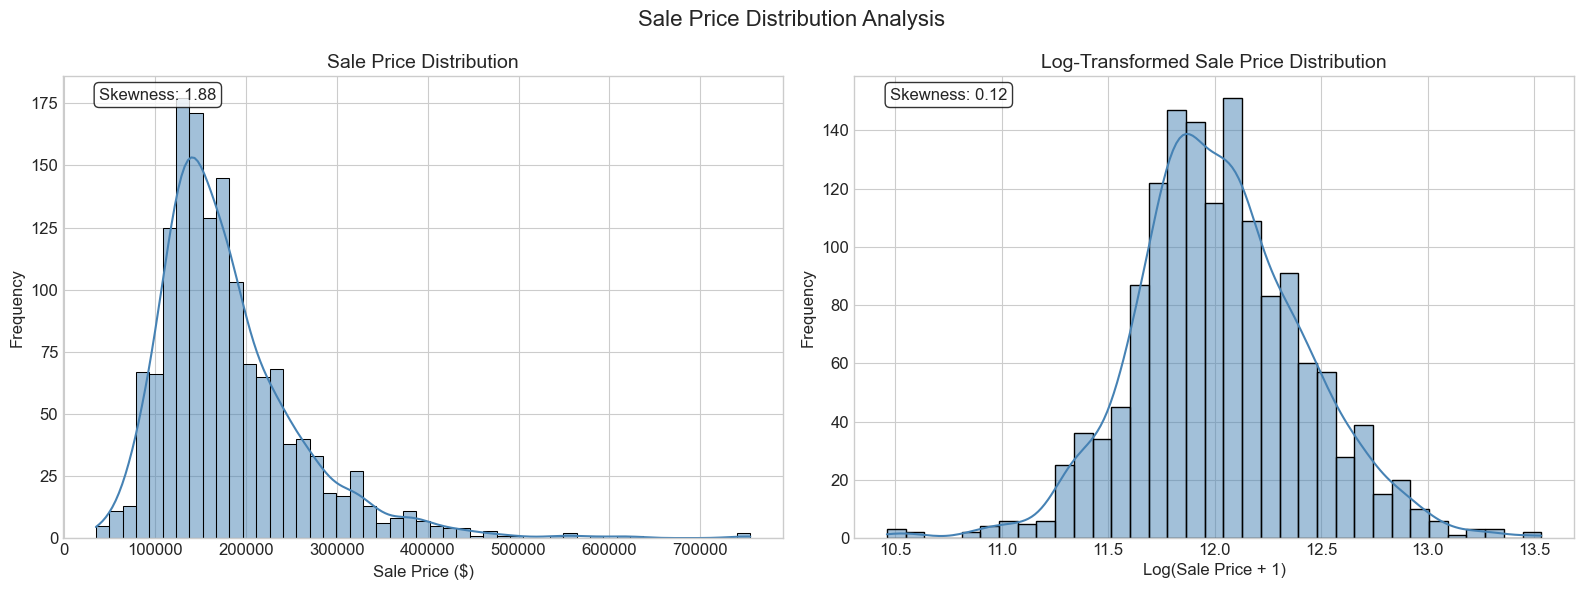

In [217]:
# Analyze the target variable
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['SalePrice'], kde=True, color='steelblue')
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.annotate(f'Skewness: {train_df["SalePrice"].skew():.2f}', 
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

# Log-transform the target variable
train_df['SalePrice_Log'] = np.log1p(train_df['SalePrice'])

plt.subplot(1, 2, 2)
sns.histplot(train_df['SalePrice_Log'], kde=True, color='steelblue')
plt.title('Log-Transformed Sale Price Distribution')
plt.xlabel('Log(Sale Price + 1)')
plt.ylabel('Frequency')
plt.annotate(f'Skewness: {train_df["SalePrice_Log"].skew():.2f}', 
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

plt.suptitle('Sale Price Distribution Analysis', fontsize=16)
plt.tight_layout()
plt.show()


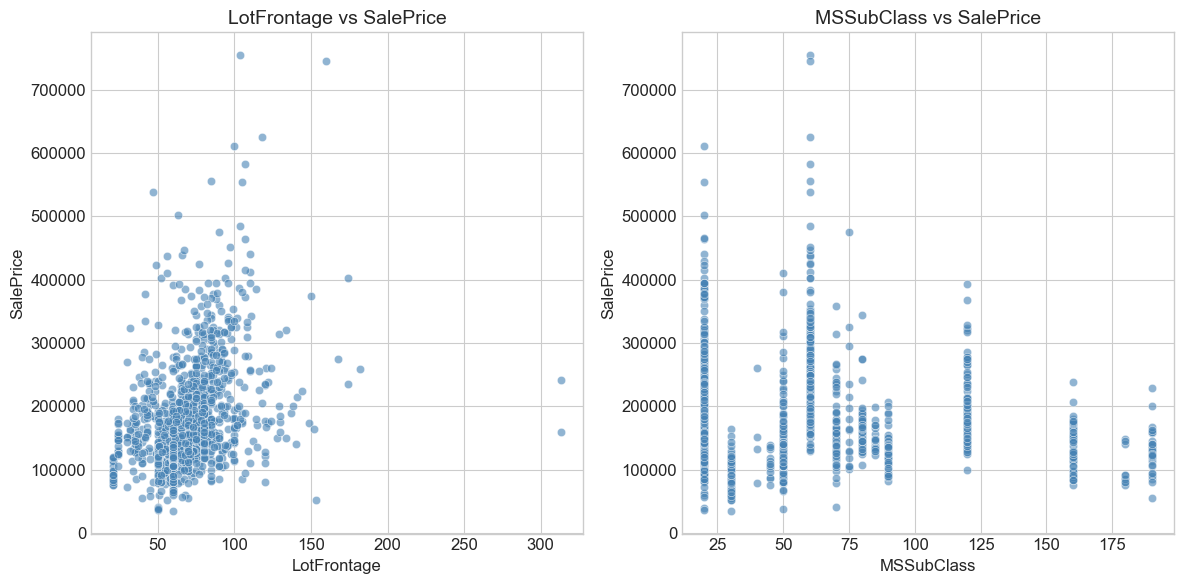

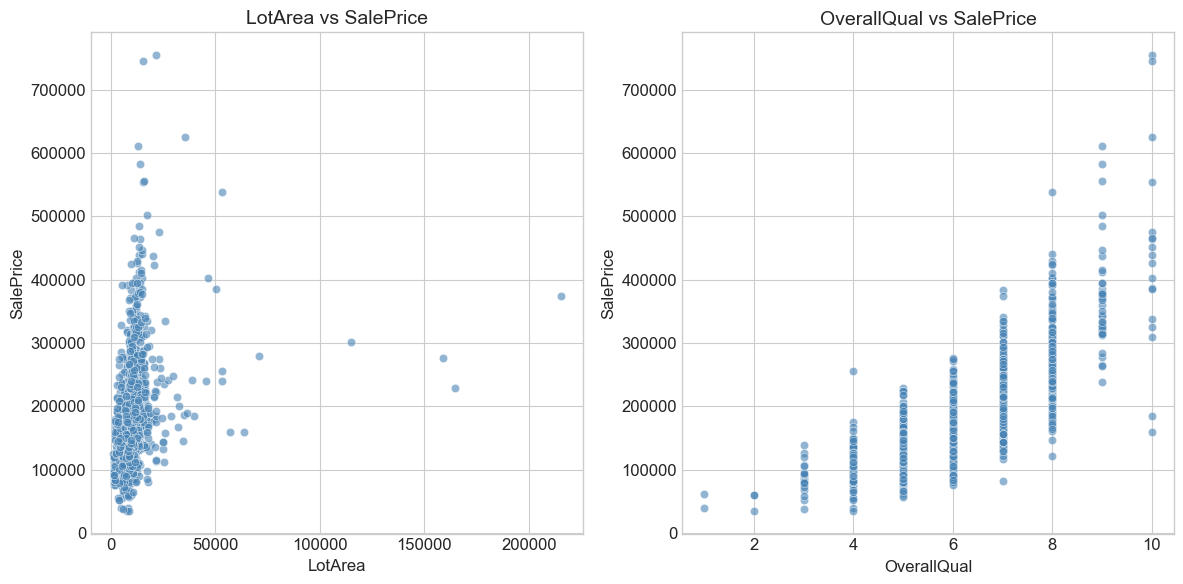

In [218]:
# Explore key features with scatter plots
# Plot LotFrontage vs SalePrice
fig, axes = plt.subplots(1, 2)
sns.scatterplot(data=train_df, x='LotFrontage', y='SalePrice', ax=axes[0], color='steelblue', alpha=0.6)
axes[0].set_title('LotFrontage vs SalePrice')
axes[0].set_xlabel('LotFrontage')
axes[0].set_ylabel('SalePrice')

# Plot MSSubClass vs SalePrice
sns.scatterplot(data=train_df, x='MSSubClass', y='SalePrice', ax=axes[1], color='steelblue', alpha=0.6)
axes[1].set_title('MSSubClass vs SalePrice')
axes[1].set_xlabel('MSSubClass')
axes[1].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

# Check for extreme LotFrontage values
train_df.query('LotFrontage > 300')

# Plot LotArea and OverallQual vs SalePrice
fig, axes = plt.subplots(1, 2)
sns.scatterplot(data=train_df, x='LotArea', y='SalePrice', ax=axes[0], color='steelblue', alpha=0.6)
axes[0].set_title('LotArea vs SalePrice')
axes[0].set_xlabel('LotArea')
axes[0].set_ylabel('SalePrice')

sns.scatterplot(data=train_df, x='OverallQual', y='SalePrice', ax=axes[1], color='steelblue', alpha=0.6)
axes[1].set_title('OverallQual vs SalePrice')
axes[1].set_xlabel('OverallQual')
axes[1].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

## Missing Value Analysis

In [219]:
# Check for missing values
missing_values = (train_df.isnull().sum() / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Missing Values (%)': missing_values,
    'Count': train_df.isnull().sum()
})
missing_df = missing_df[missing_df['Count'] > 0].sort_values('Missing Values (%)', ascending=False)
missing_df

Missing Values (%)  Count
PoolQC                 99.520548   1453
MiscFeature            96.301370   1406
Alley                  93.767123   1369
Fence                  80.753425   1179
MasVnrType             59.726027    872
FireplaceQu            47.260274    690
LotFrontage            17.739726    259
GarageType              5.547945     81
GarageYrBlt             5.547945     81
GarageFinish            5.547945     81
GarageQual              5.547945     81
GarageCond              5.547945     81
BsmtFinType2            2.602740     38
BsmtExposure            2.602740     38
BsmtFinType1            2.534247     37
BsmtCond                2.534247     37
BsmtQual                2.534247     37
MasVnrArea              0.547945      8
Electrical              0.068493      1

<Axes: >

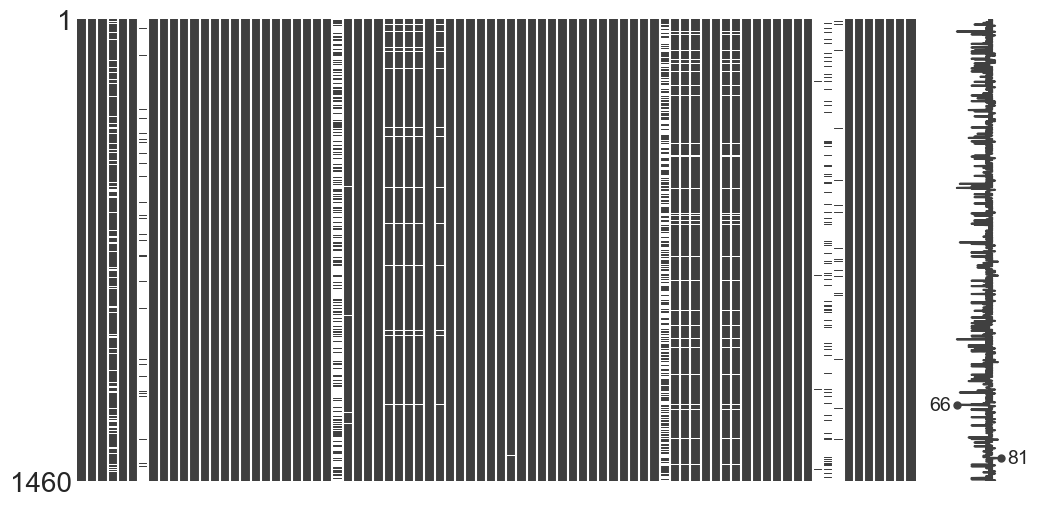

In [220]:
import missingno as msno
# Visualize missing values
msno.matrix(train_df, figsize=(12, 6))
# Visualize missing values in a heatmap

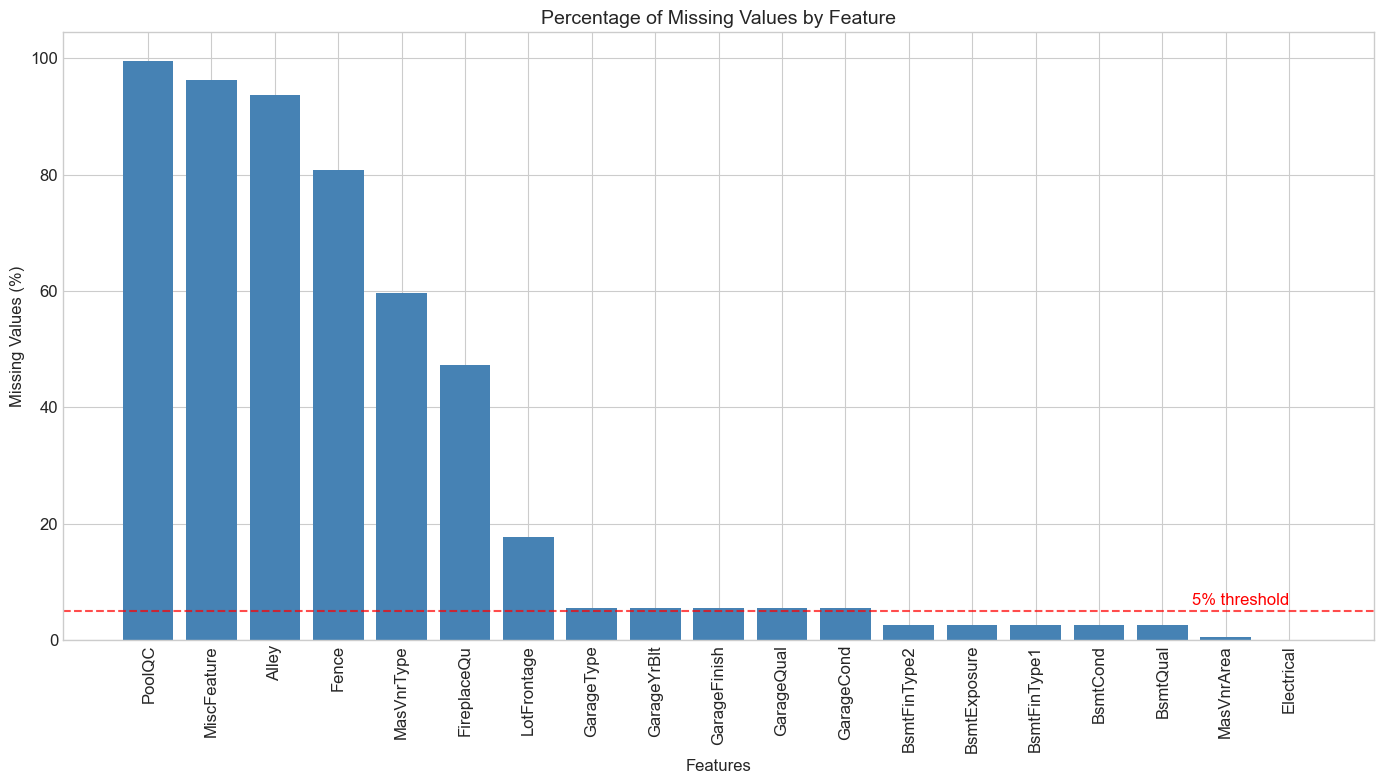

In [221]:
# Visualize missing values
plt.figure(figsize=(14, 8))
plt.bar(missing_df.index, missing_df['Missing Values (%)'], color='steelblue')
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Missing Values (%)')
plt.xticks(rotation=90)
plt.axhline(y=5, color='red', linestyle='--', alpha=0.7)
plt.text(len(missing_df) - 1, 6, '5% threshold', color='red', ha='right')
plt.tight_layout()
plt.show()

In [222]:
# Missing value insights
print("\nMissing value analysis insights:")
print("- Features like PoolQC, MiscFeature, Alley have more than 90% missing values")
print("- LotFrontage is missing in about 17.7% of cases")
print("- Several garage and basement features have missing values")
print("- Missing values treatment strategy will be based on feature importance and domain knowledge")


Missing value analysis insights:
- Features like PoolQC, MiscFeature, Alley have more than 90% missing values
- LotFrontage is missing in about 17.7% of cases
- Several garage and basement features have missing values
- Missing values treatment strategy will be based on feature importance and domain knowledge


# Correlation Analysis

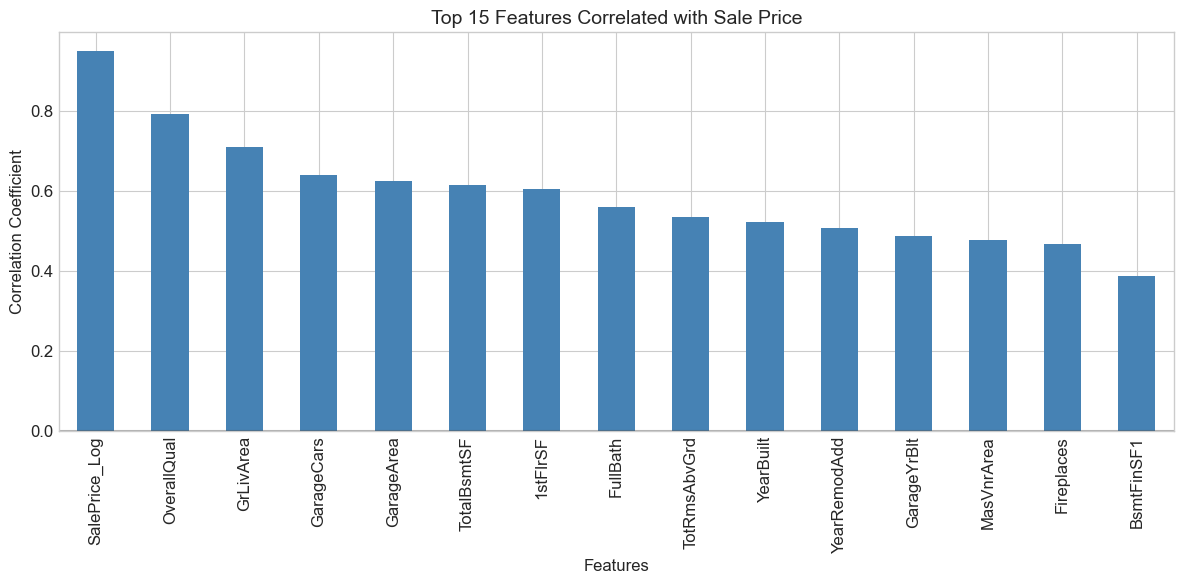

In [223]:
# Calculate correlations for numerical features
numeric_features = train_df.select_dtypes(include=['int64', 'float64']).columns
correlation = train_df[numeric_features].corr()['SalePrice'].drop('SalePrice').sort_values(ascending=False)

# Show top positive correlations
correlation.head(15)

# Show bottom (negative) correlations
correlation.tail(5)

# Visualize top correlations
correlation.head(15).plot(kind='bar', color='steelblue')
plt.title('Top 15 Features Correlated with Sale Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

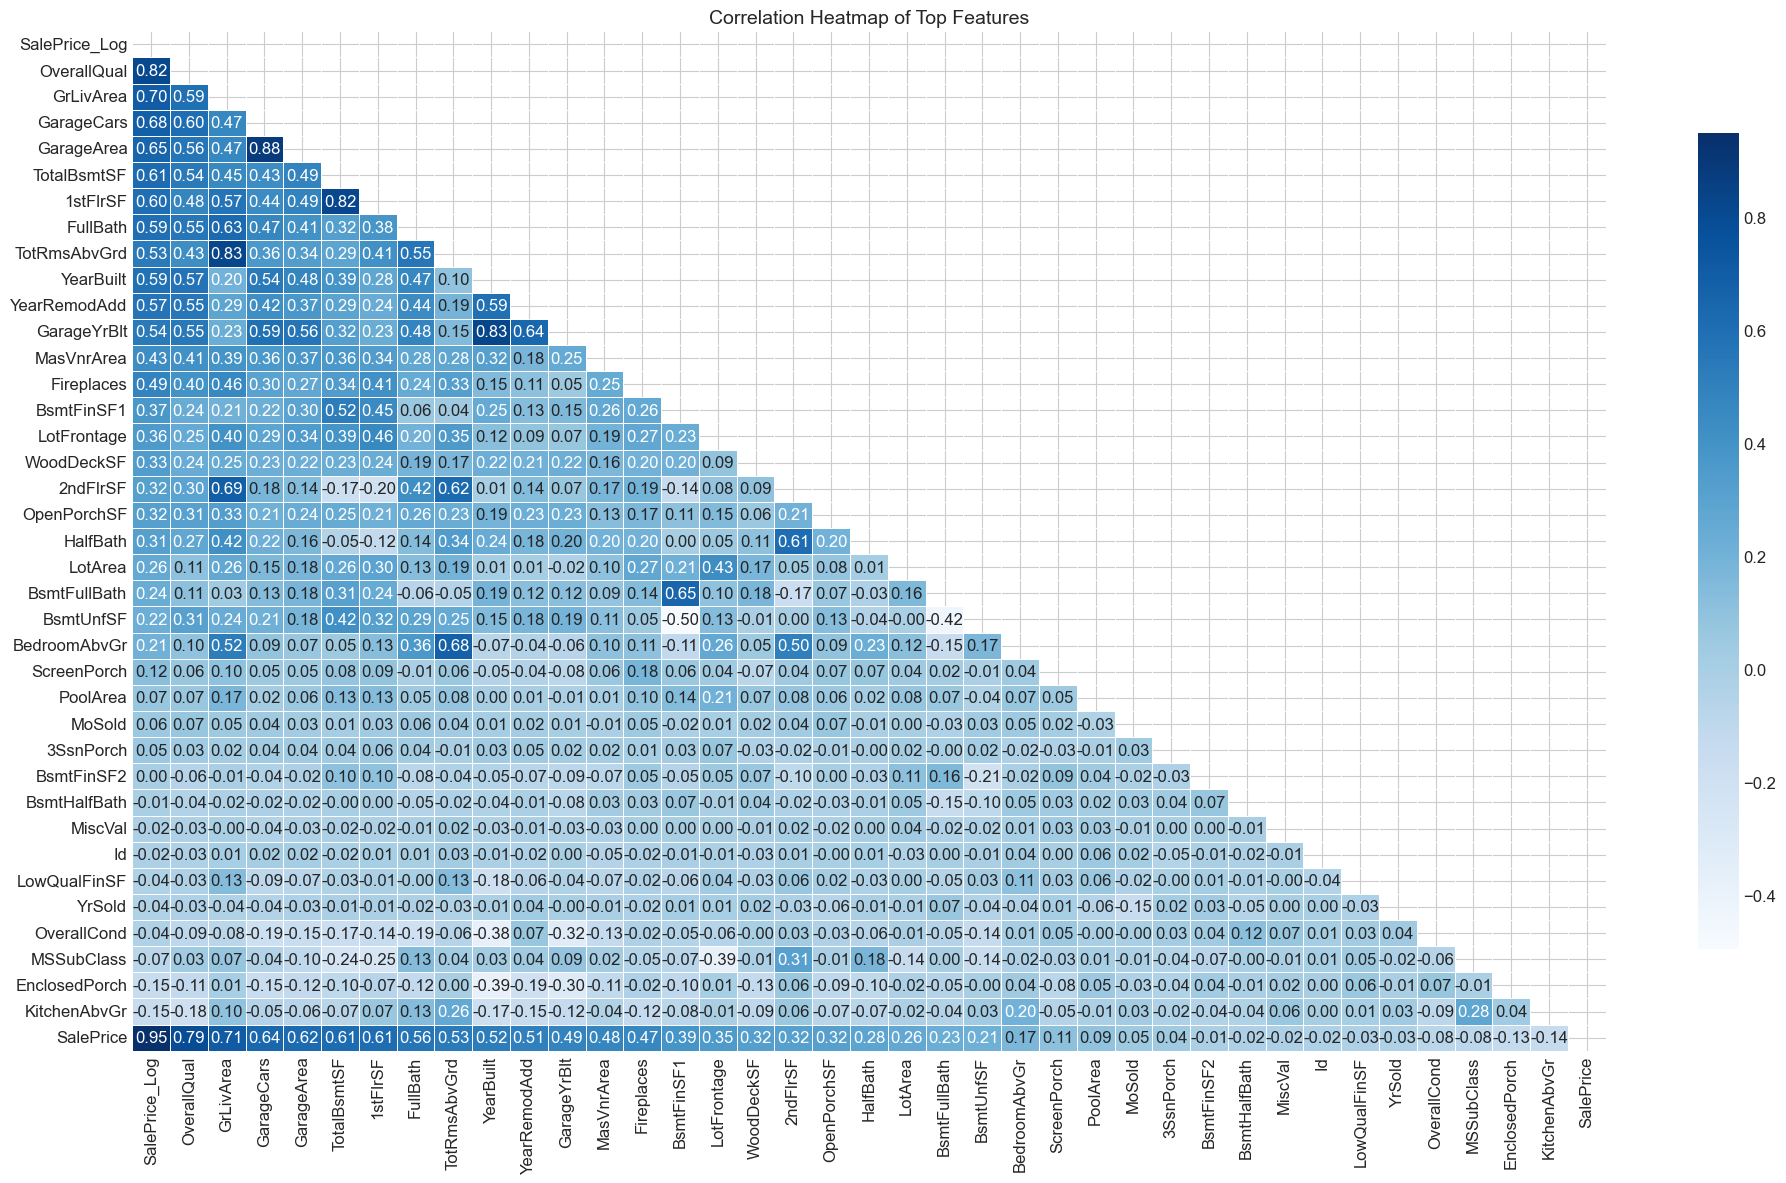

In [224]:
# Create correlation heatmap of top correlated features
plt.figure(figsize=(20, 12))
top_corr_features = correlation.index.tolist()
top_corr_features.append('SalePrice')
corr_matrix = train_df[top_corr_features].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='Blues',
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Top Features')
plt.tight_layout()
plt.show()

## Outlier Deteaction

In [225]:
print("\nSystematic approach to outlier detection:")
print("1. Z-score analysis for univariate outliers")
print("2. Scatter plot inspection for bivariate outliers")
print("3. Automated outlier detection with Isolation Forest")
print("4. Domain knowledge validation of outlier flags")
print("5. Removal of outliers based on analysis")


Systematic approach to outlier detection:
1. Z-score analysis for univariate outliers
2. Scatter plot inspection for bivariate outliers
3. Automated outlier detection with Isolation Forest
4. Domain knowledge validation of outlier flags
5. Removal of outliers based on analysis


In [226]:
# Function to identify and visualize outliers in numerical features
def detect_outliers(df, column, threshold=3):
    """
    Detect outliers in a numeric column using z-score method
    
    Args:
        df: DataFrame containing the data
        column: Column name to analyze
        threshold: Z-score threshold (default 3)
        
    Returns:
        DataFrame with outlier rows
    """
    z_scores = stats.zscore(df[column].dropna())
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores > threshold)
    outliers = df[column].dropna()[filtered_entries]
    outlier_indices = outliers.index
    
    if len(outlier_indices) > 0:
        print(f"\nOutliers in {column} using z-score > {threshold}:")
        print(f"Number of outliers: {len(outlier_indices)}")
        print(f"Outlier indices: {outlier_indices.tolist()}")
        
        # # Create box plot with outliers highlighted
        # plt.figure(figsize=(10, 6))
        # sns.boxplot(x=df[column], color='lightblue')
        # plt.title(f'Boxplot of {column} with Outliers')
        # plt.xlabel(column)
        # plt.tight_layout()
        # plt.show()
        
        # Create scatter plot with SalePrice
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=column, y='SalePrice', alpha=0.5, color='steelblue')
        
        # Highlight outliers
        outlier_data = df.loc[outlier_indices]
        sns.scatterplot(data=outlier_data, x=column, y='SalePrice', color='red', s=100, label='Outliers')
        
        plt.title(f'{column} vs Sale Price with Outliers Highlighted')
        plt.xlabel(column)
        plt.ylabel('Sale Price ($)')
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        return df.loc[outlier_indices]
    else:
        print(f"No outliers found in {column} using z-score > {threshold}")
        return pd.DataFrame()


Outliers in LotArea using z-score > 3.5:
Number of outliers: 13
Outlier indices: [53, 249, 313, 335, 384, 451, 457, 661, 706, 769, 848, 1298, 1396]


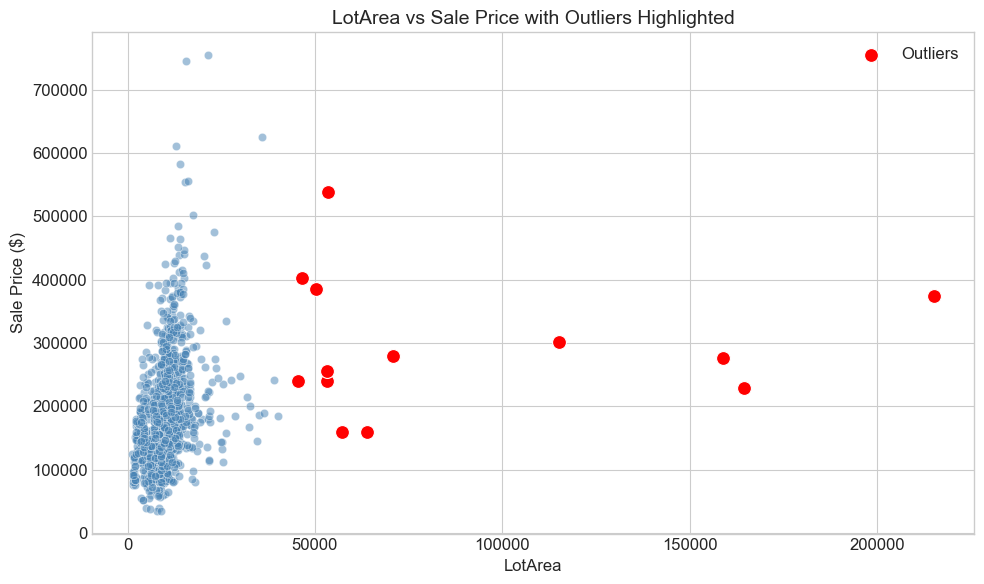


Outliers in LotFrontage using z-score > 3.5:
Number of outliers: 7
Outlier indices: [197, 231, 934, 1107, 1127, 1182, 1298]


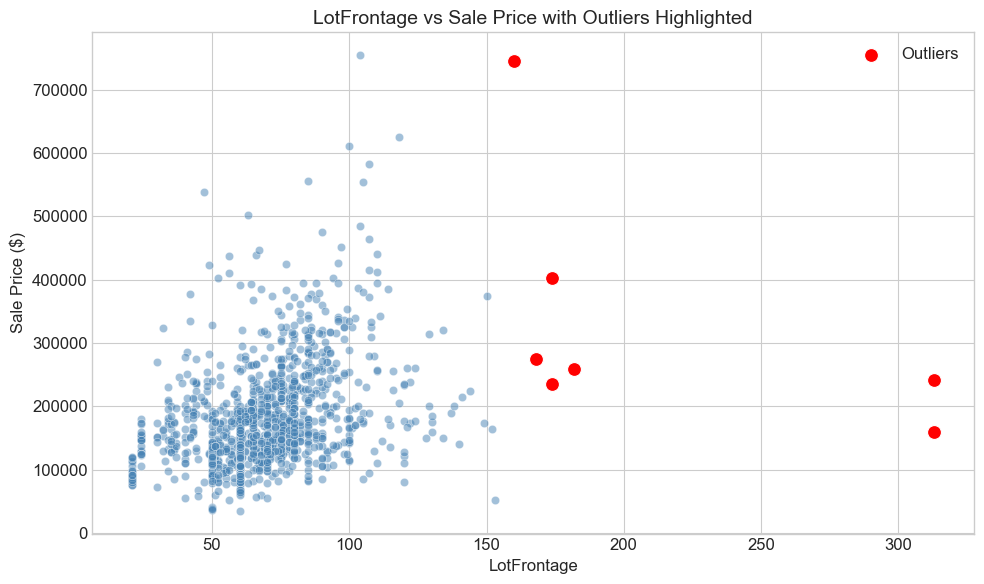


Outliers in GrLivArea using z-score > 3.5:
Number of outliers: 9
Outlier indices: [185, 304, 523, 635, 691, 1169, 1182, 1268, 1298]


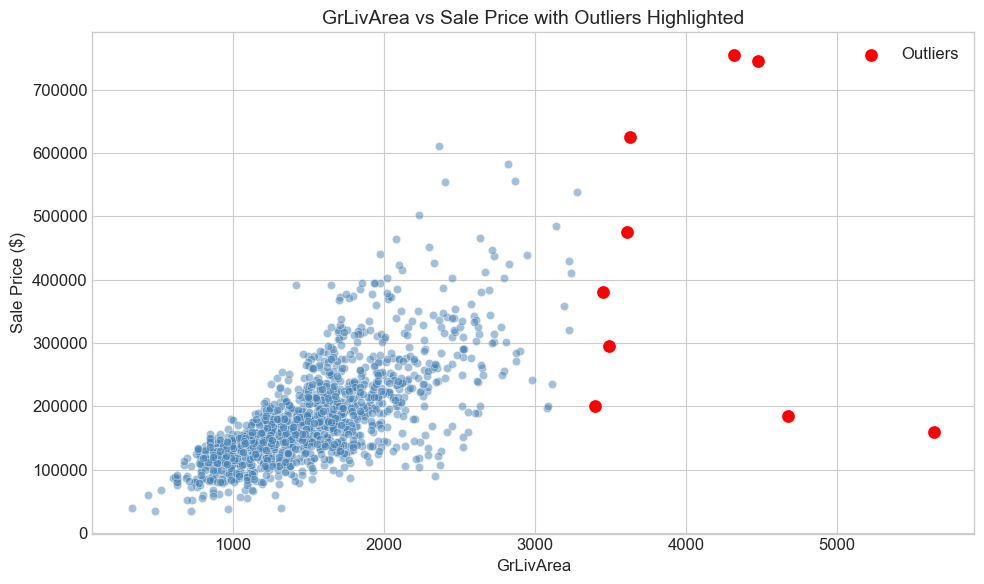


Outliers in TotalBsmtSF using z-score > 3.5:
Number of outliers: 6
Outlier indices: [332, 440, 496, 523, 1298, 1373]


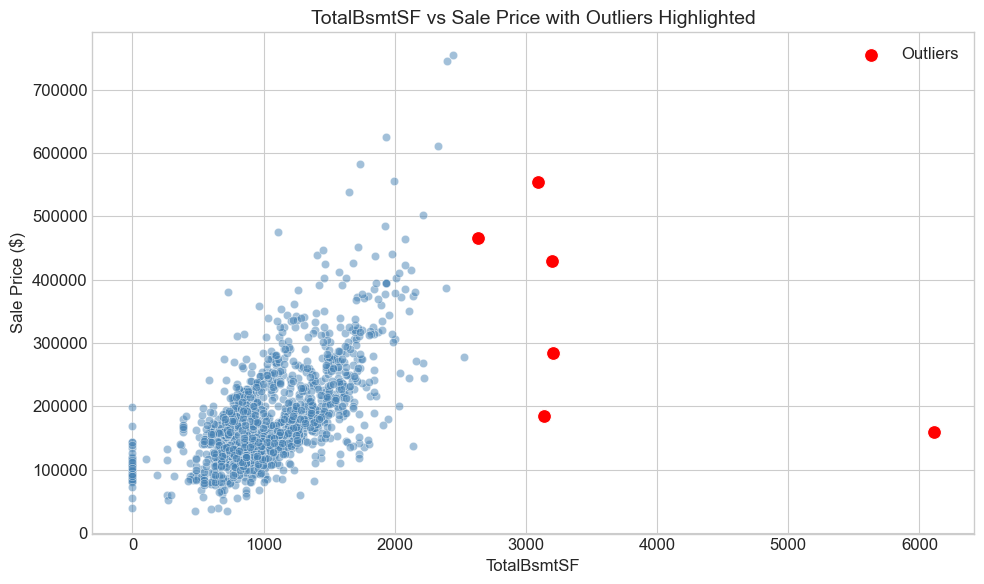


Outliers in OverallQual using z-score > 3.5:
Number of outliers: 2
Outlier indices: [375, 533]


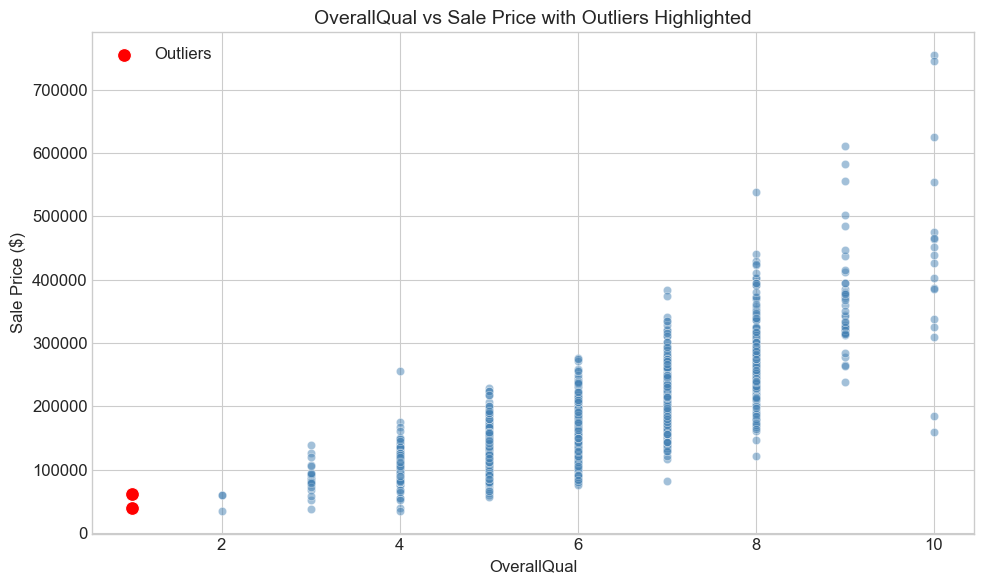


Outliers in MasVnrArea using z-score > 3.5:
Number of outliers: 22
Outlier indices: [58, 70, 105, 115, 178, 224, 297, 349, 477, 517, 523, 691, 755, 798, 808, 825, 898, 981, 1169, 1228, 1289, 1298]


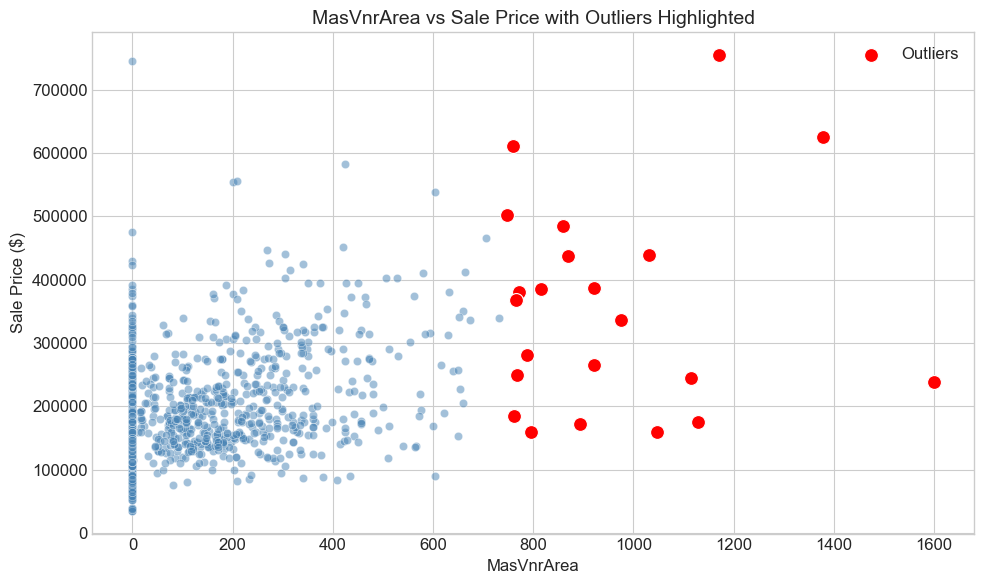


Outliers in BsmtFinSF1 using z-score > 3.5:
Number of outliers: 4
Outlier indices: [523, 898, 1182, 1298]


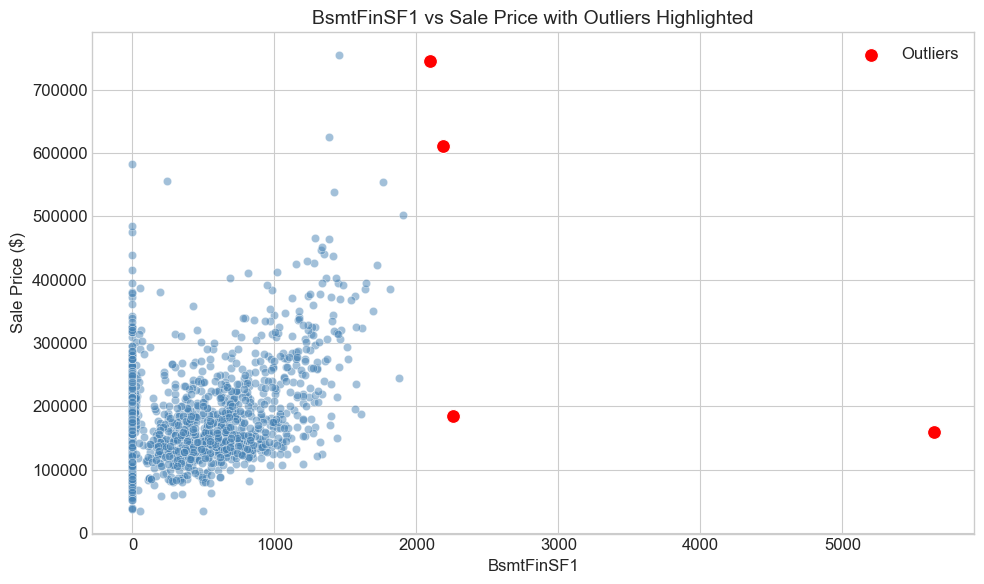


Outliers in GarageArea using z-score > 3.5:
Number of outliers: 4
Outlier indices: [581, 1061, 1190, 1298]


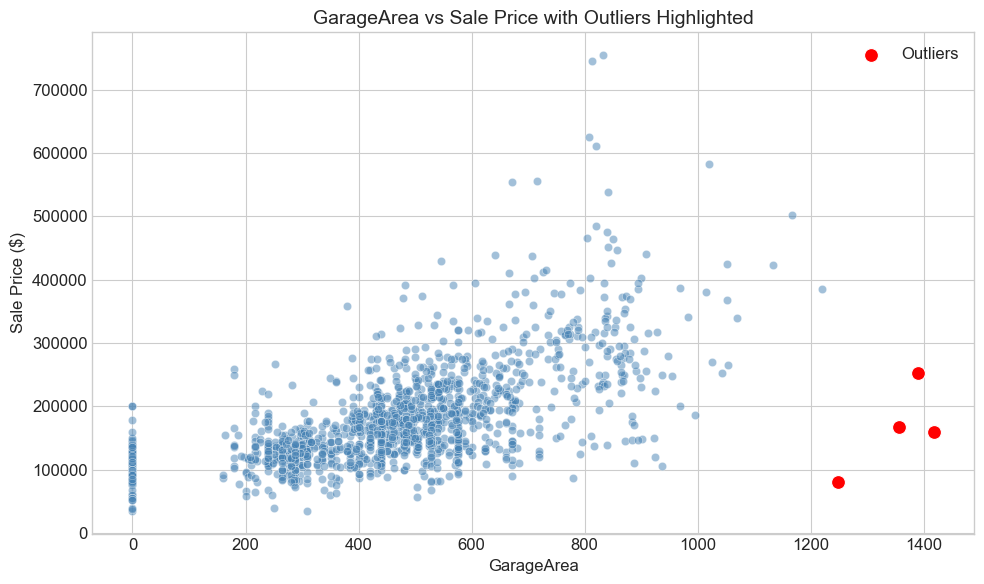

Text(0, 0.5, 'Sale Price ($)')

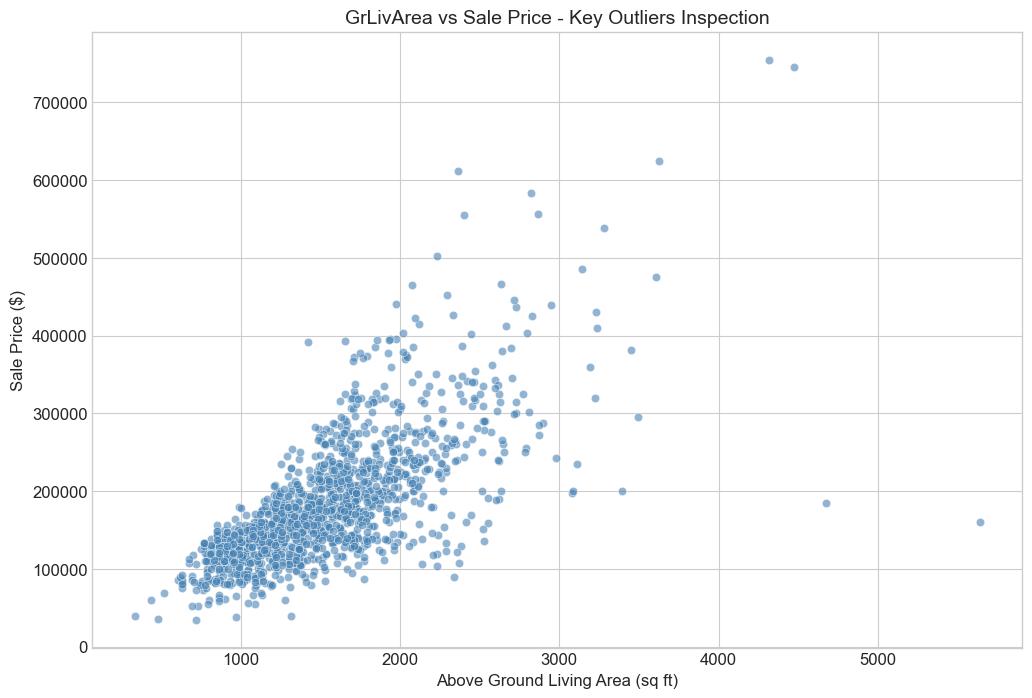

In [227]:
# Analysis of key numeric features for outliers
key_features = ['LotArea', 'LotFrontage', 'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'GarageArea']

all_outliers = []
for feature in key_features:
    if feature in train_df.columns:
        outliers = detect_outliers(train_df, feature, threshold=3.5)
        if not outliers.empty:
            all_outliers.extend(outliers.index.tolist())

# Identify bivariate outliers: unusually high GrLivArea with low SalePrice
plt.figure(figsize=(12, 8))
sns.scatterplot(data=train_df, x='GrLivArea', y='SalePrice', alpha=0.6, color='steelblue')
plt.title('GrLivArea vs Sale Price - Key Outliers Inspection')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')

In [228]:
# Automated multivariate outlier detection with Isolation Forest

# Select numerical features for isolation forest
num_features = train_df.select_dtypes(include=['int64', 'float64']).drop(['Id', 'SalePrice', 'SalePrice_Log'], axis=1, errors='ignore').columns.tolist()

# Initialize and fit the model
iso_forest = IsolationForest(contamination=0.025, random_state=42)
outlier_predictions = iso_forest.fit_predict(train_df[num_features].fillna(train_df[num_features].median()))

# Get indices of detected outliers
iso_outliers = np.where(outlier_predictions == -1)[0]
iso_outlier_ids = train_df.iloc[iso_outliers]['Id'].tolist()

print(f"Isolation Forest detected {len(iso_outliers)} outliers")
print(f"Outlier IDs: {iso_outlier_ids[:10]}... (showing first 10)")

# Add all detected outliers to our list
all_outliers.extend(iso_outliers)

# Unique outlier IDs
unique_outliers = list(set(all_outliers))
unique_outlier_ids = train_df.iloc[unique_outliers]['Id'].tolist()

print(f"\nTotal unique outliers detected: {len(unique_outliers)}")
print(f"These correspond to the following IDs:")
print(unique_outlier_ids)

Isolation Forest detected 37 outliers
Outlier IDs: [54, 94, 119, 167, 186, 198, 305, 314, 336, 441]... (showing first 10)

Total unique outliers detected: 72
These correspond to the following IDs:
[385, 770, 899, 518, 521, 1290, 1417, 524, 1170, 1299, 530, 662, 534, 1174, 922, 1183, 799, 804, 677, 1062, 935, 1191, 809, 298, 167, 943, 305, 1329, 179, 692, 1458, 54, 441, 314, 186, 59, 826, 706, 707, 452, 198, 71, 582, 584, 458, 1351, 333, 1229, 1231, 336, 849, 1108, 982, 1374, 350, 478, 225, 94, 232, 1128, 106, 746, 1387, 497, 116, 1397, 1269, 756, 376, 119, 250, 636]


## Feature Relationships & Variable Importance

In [229]:
# Create a function for cleaner visualization of feature relationships
def plot_feature_relationship(df, x_col, y_col='SalePrice', categorical=False):
    """
    Create a clean visualization of relationship between features
    
    Args:
        df: DataFrame
        x_col: Feature to plot on x-axis
        y_col: Target variable (default: SalePrice)
        categorical: Boolean indicating if x_col is categorical
    """
    plt.figure(figsize=(12, 6))
    
    if categorical:
        # For categorical features
        plt.subplot(1, 2, 1)
        sns.boxplot(data=df, x=x_col, y=y_col, palette='Blues')
        plt.title(f'Relationship between {x_col} and {y_col}')
        plt.xticks(rotation=90)
        
        plt.subplot(1, 2, 2)
        data = df.groupby(x_col)[y_col].mean().sort_values().reset_index()
        sns.barplot(data=data, x=x_col, y=y_col, palette='Blues')
        plt.title(f'Average {y_col} by {x_col}')
        plt.xticks(rotation=90)
    else:
        # For numerical features
        plt.subplot(1, 2, 1)
        sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.6, color='steelblue')
        plt.title(f'{x_col} vs {y_col}')
        
        # Add a regression line
        sns.regplot(data=df, x=x_col, y=y_col, scatter=False, color='red')
        
        plt.subplot(1, 2, 2)
        df_binned = pd.cut(df[x_col], bins=10)
        data = df.groupby(df_binned)[y_col].mean().reset_index()
        sns.barplot(data=data, x=x_col, y=y_col, palette='Blues')
        plt.title(f'Binned {x_col} vs Average {y_col}')
        plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

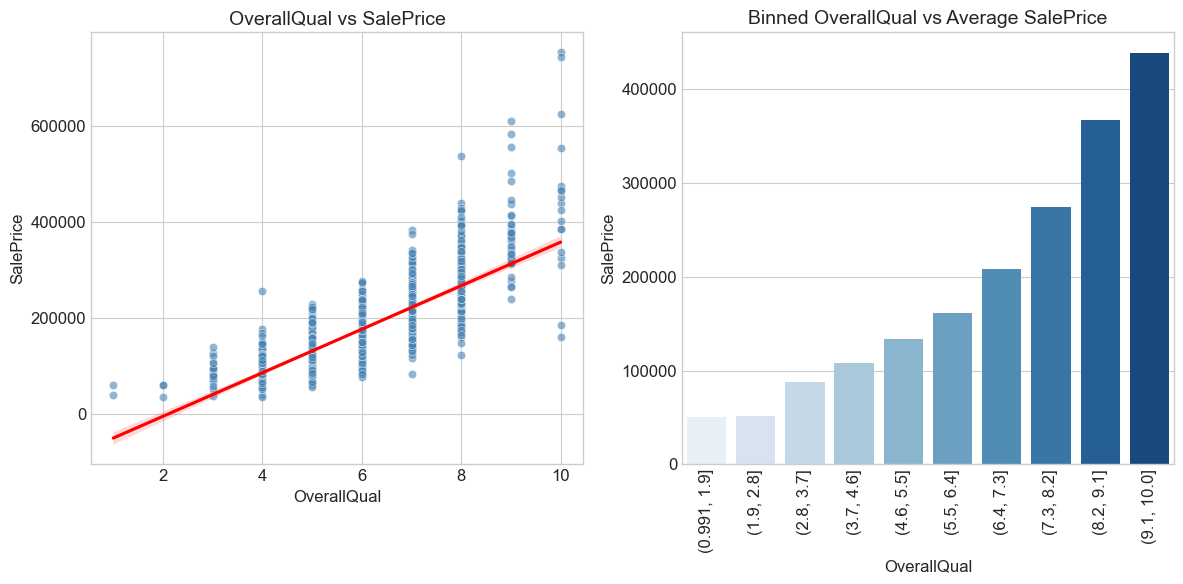

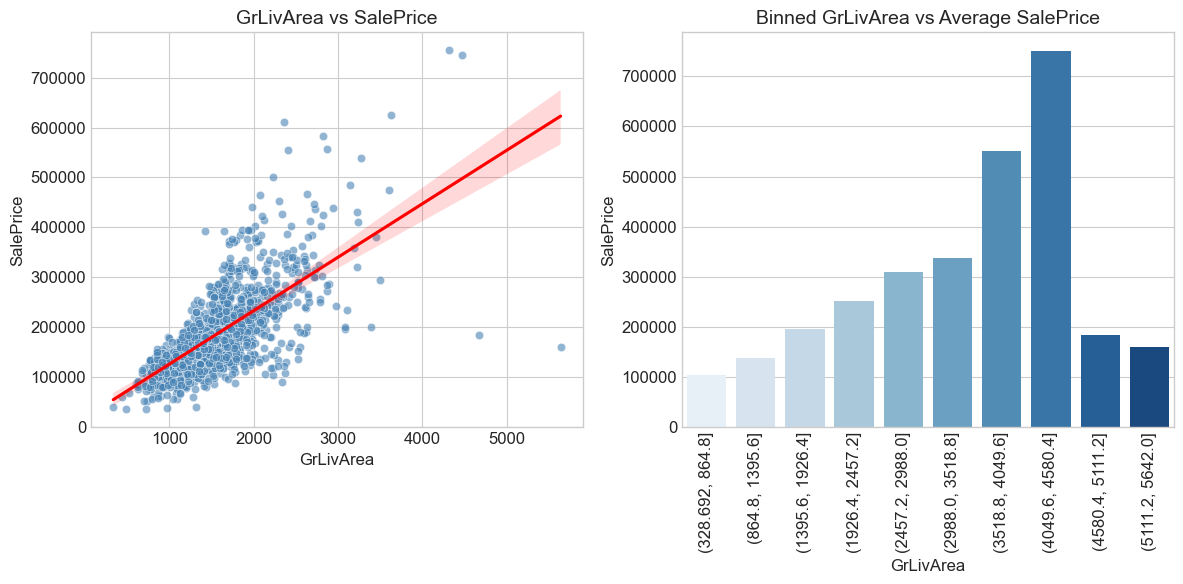

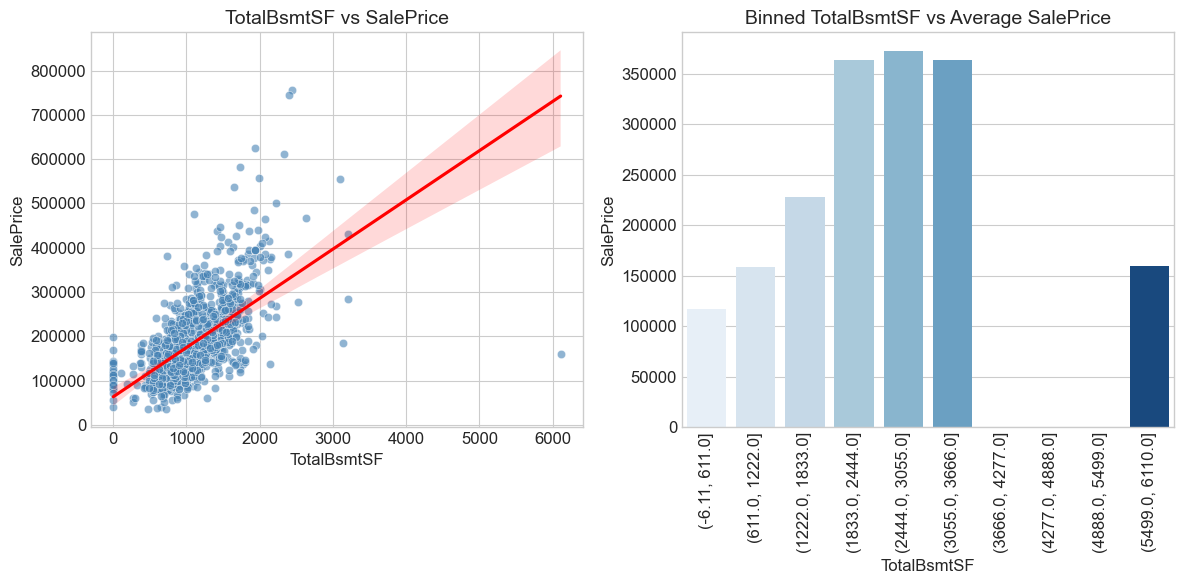

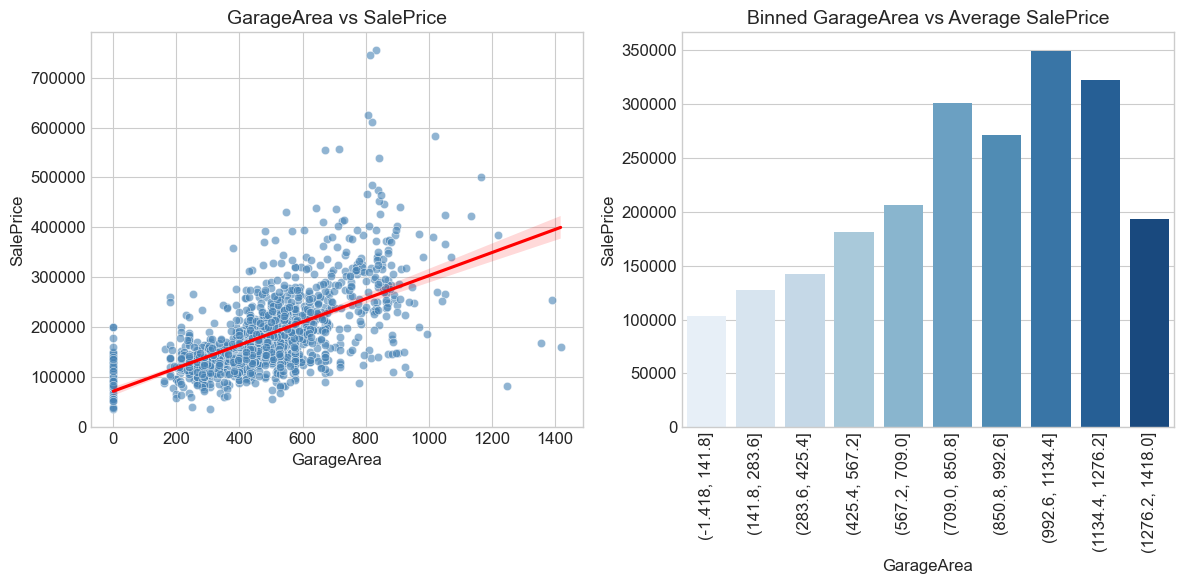

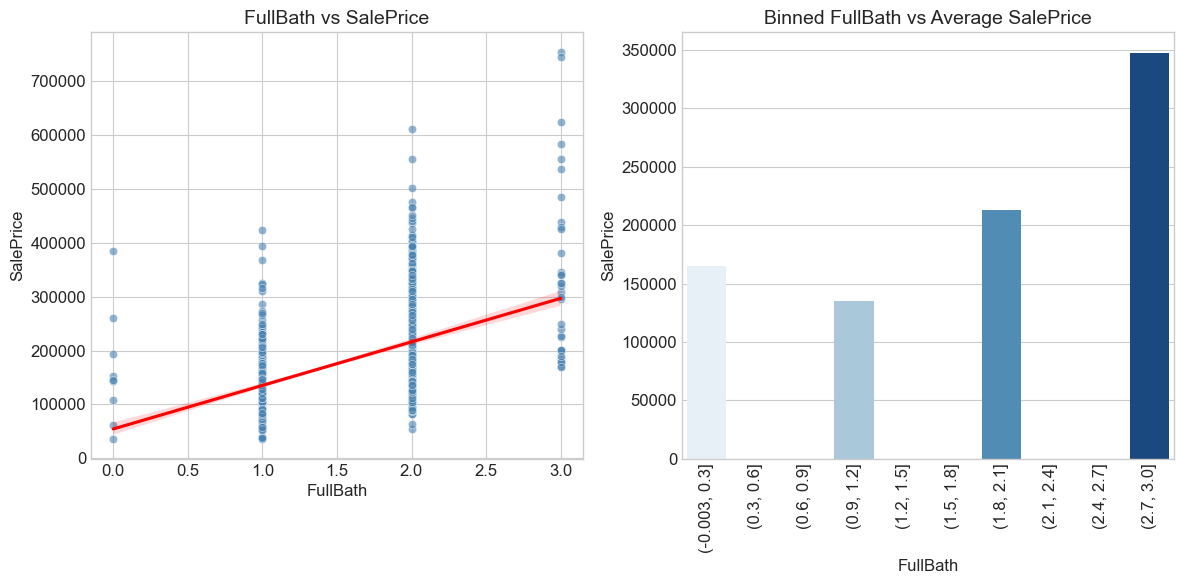

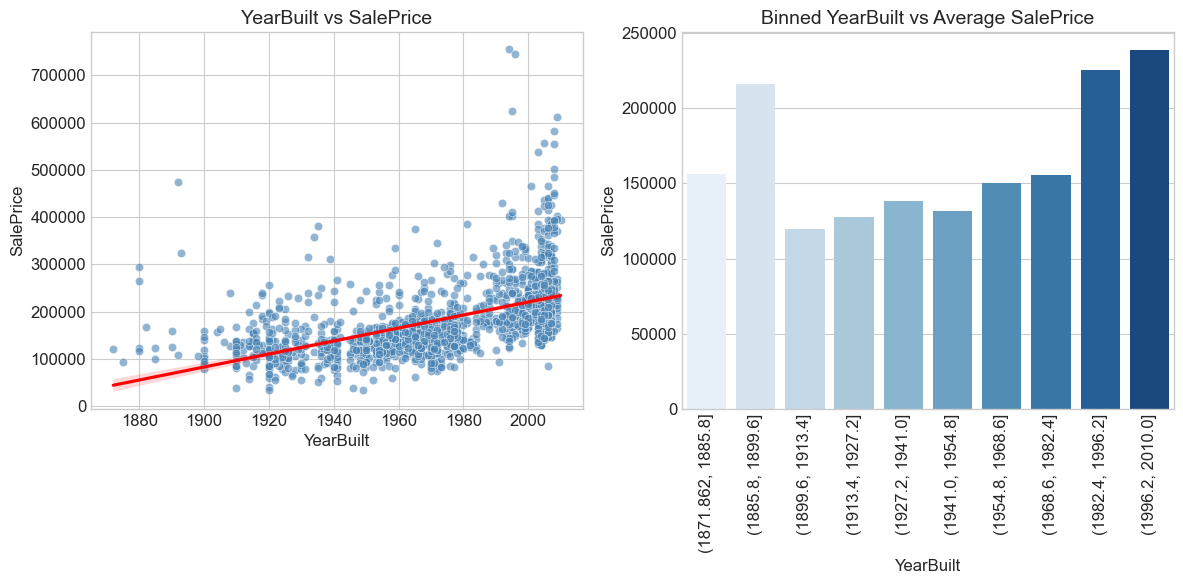

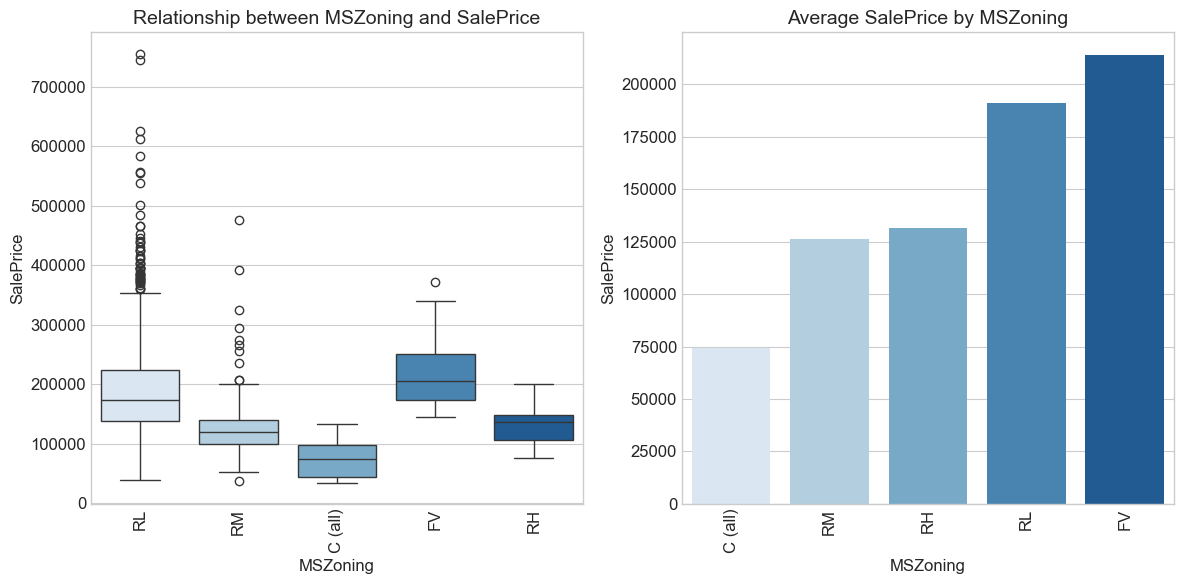

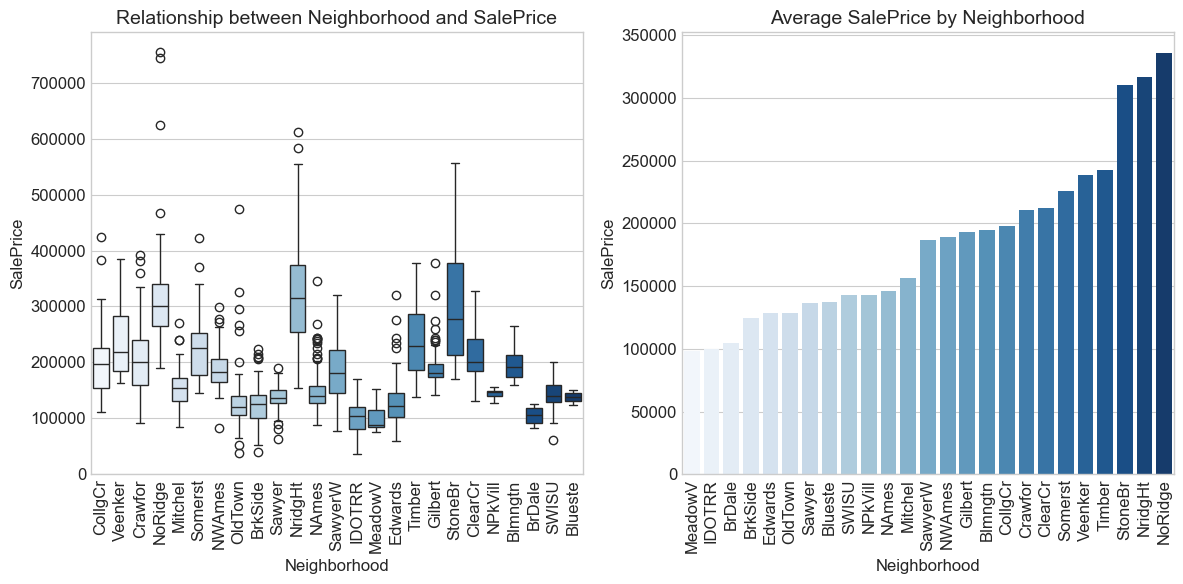

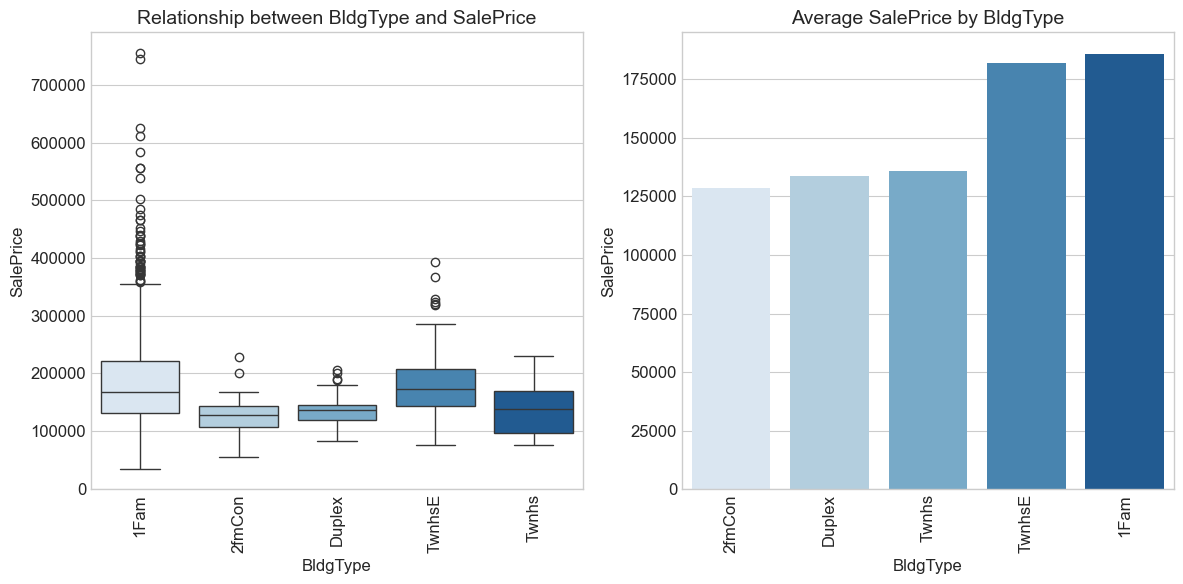

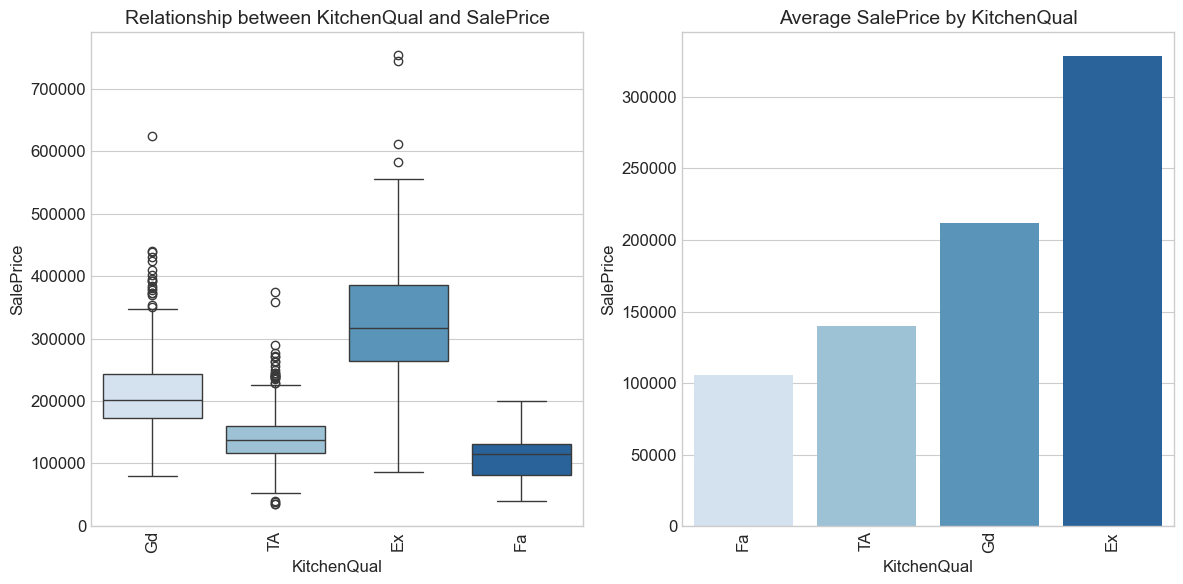

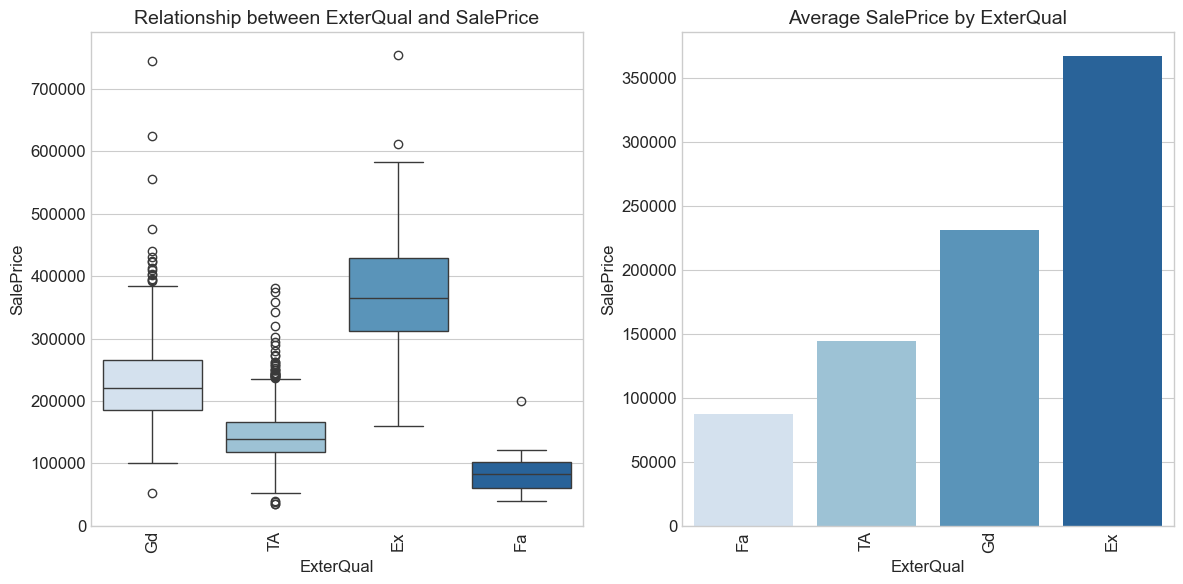

<Figure size 1600x1200 with 0 Axes>

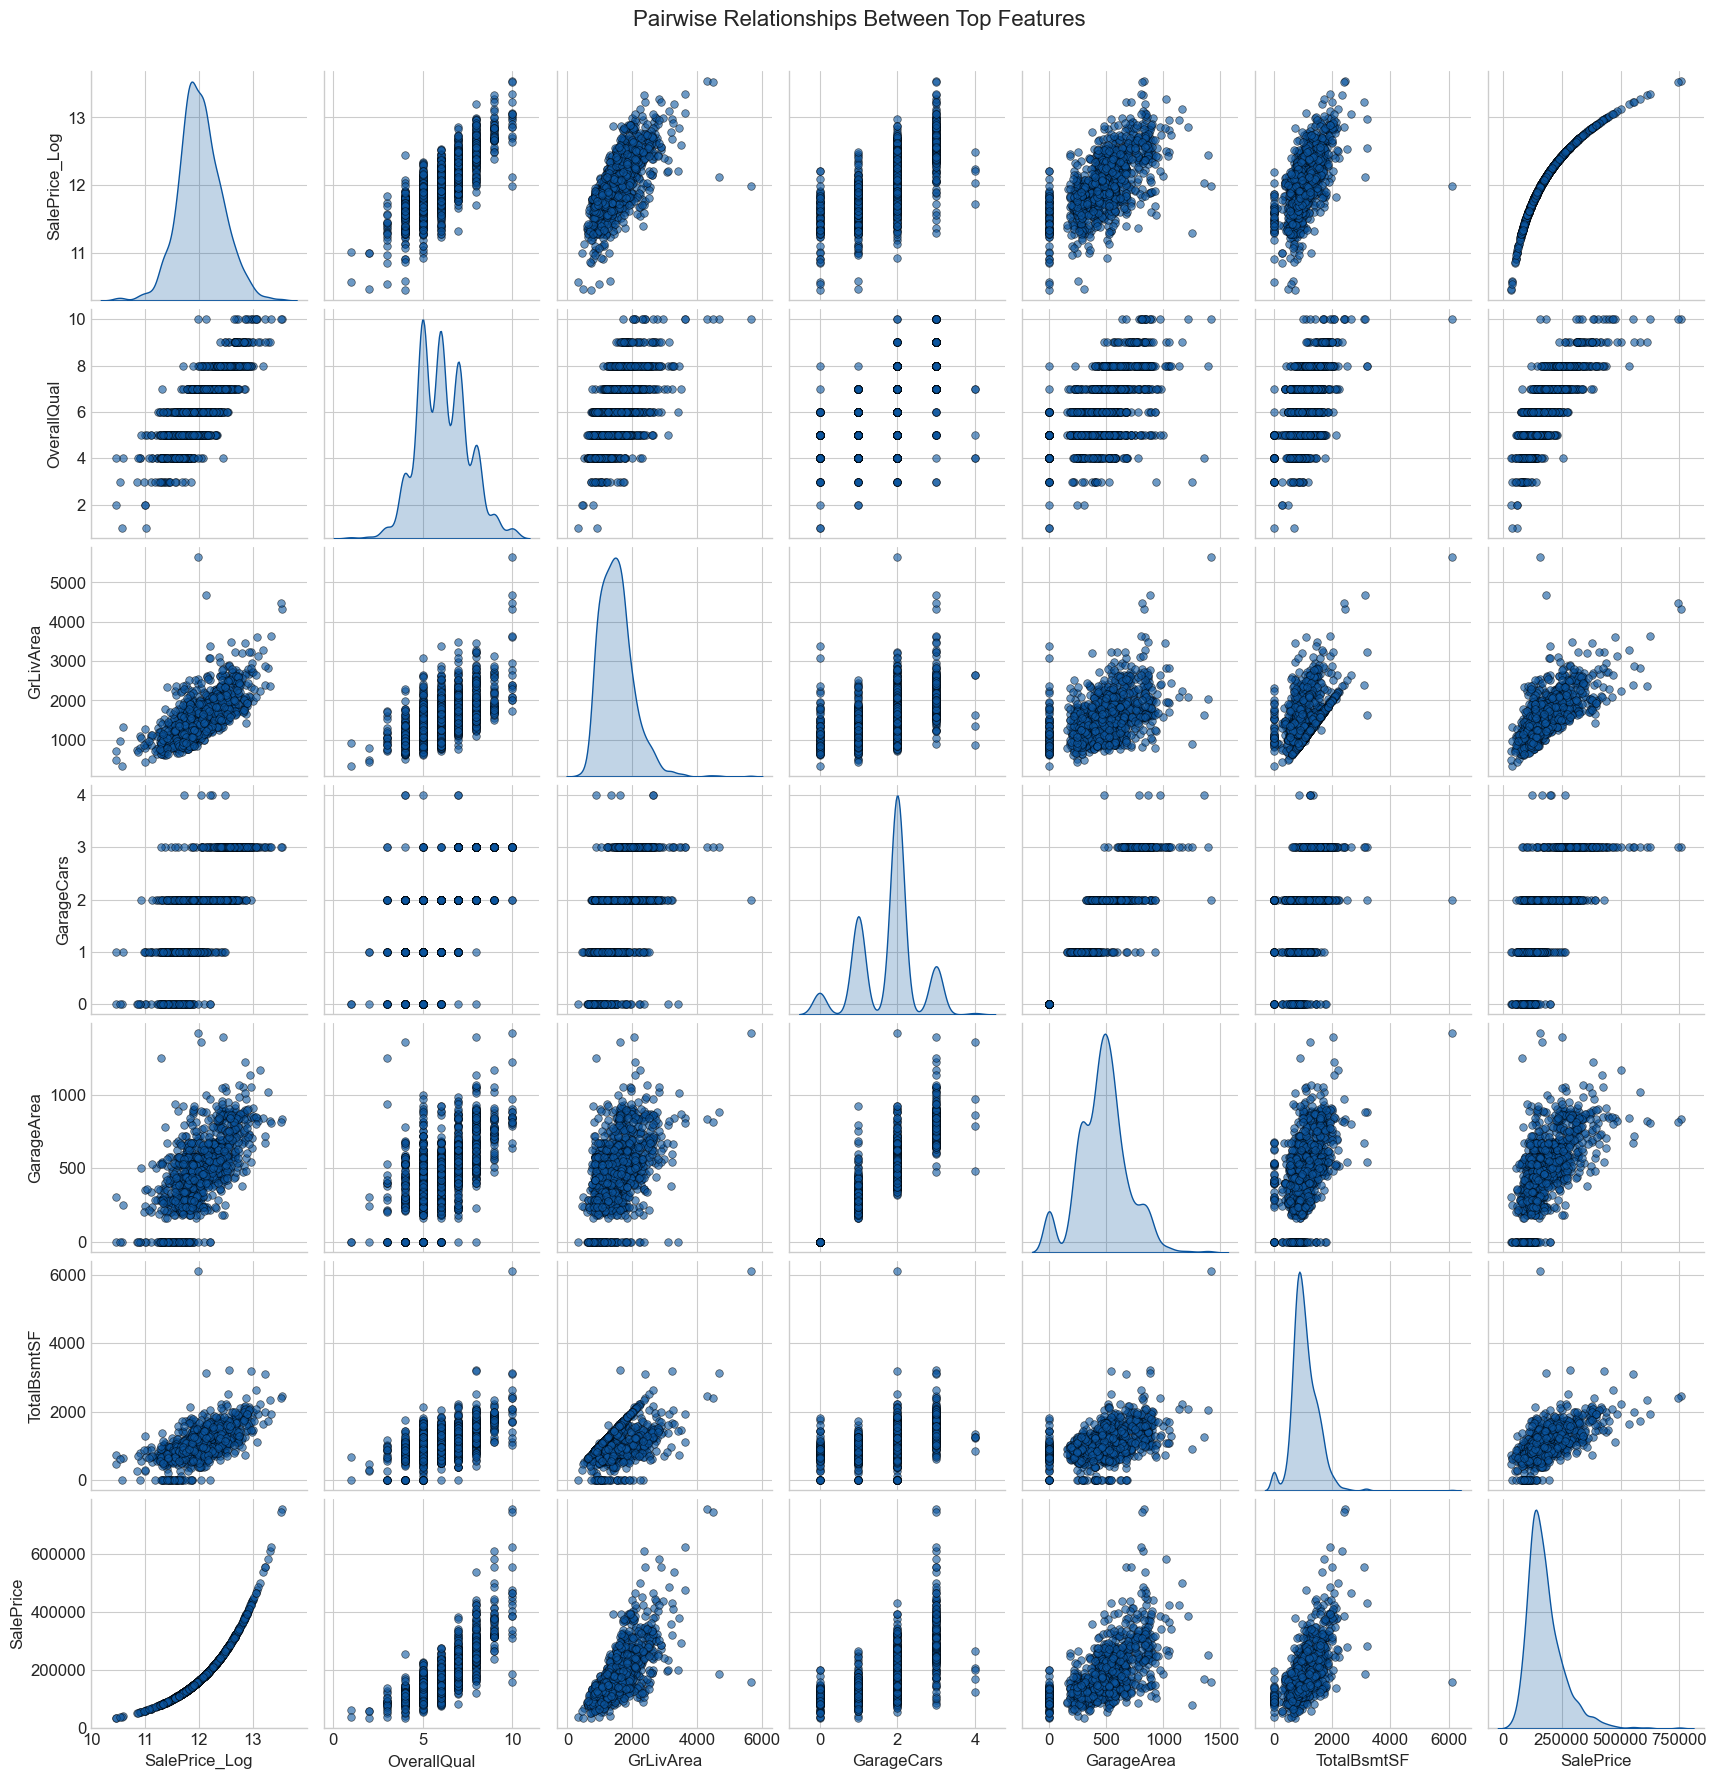

In [230]:
# Analyze relationships for important numerical features
numerical_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'FullBath', 'YearBuilt']
for feature in numerical_features:
    if feature in train_df.columns:
        plot_feature_relationship(train_df, feature, 'SalePrice', categorical=False)

# Analyze relationships for important categorical features
categorical_features = ['MSZoning', 'Neighborhood', 'BldgType', 'KitchenQual', 'ExterQual']
for feature in categorical_features:
    if feature in train_df.columns:
        plot_feature_relationship(train_df, feature, 'SalePrice', categorical=True)

# Advanced visualization: Feature relationship matrix for top features
top_features = correlation.head(6).index.tolist()
if 'SalePrice' not in top_features:
    top_features.append('SalePrice')

plt.figure(figsize=(16, 12))
sns.pairplot(train_df[top_features], height=2.5, diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k', 'linewidth': 0.5})
plt.suptitle('Pairwise Relationships Between Top Features', y=1.02, fontsize=16)
plt.show()

## Feature Engineering

In [231]:
print("\nPerforming feature engineering:")
print("1. Creating age-related features")
print("2. Creating total area features")
print("3. Creating bathroom and room features")
print("4. Creating other aggregate features")


Performing feature engineering:
1. Creating age-related features
2. Creating total area features
3. Creating bathroom and room features
4. Creating other aggregate features


In [232]:
# Age-related features
train_df['houseage'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['houseage'] = test_df['YrSold'] - test_df['YearBuilt']

train_df['houseremodelage'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['houseremodelage'] = test_df['YrSold'] - test_df['YearRemodAdd']

# Area-related features
train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
test_df['totalsf'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

# Bathroom and porch features
train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath']) 
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath']) 

train_df['totalporchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df['totalporchsf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [233]:
# Check correlation of new features with SalePrice
new_features = ['houseage', 'houseremodelage', 'totalsf', 'totalarea', 'totalbaths', 'totalporchsf']
new_features_corr = train_df[new_features + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)
print("\nCorrelation of new features with SalePrice:")
print(new_features_corr)


Correlation of new features with SalePrice:
SalePrice          1.000000
totalarea          0.778959
totalsf            0.708047
totalbaths         0.631731
totalporchsf       0.390993
houseremodelage   -0.509079
houseage          -0.523350
Name: SalePrice, dtype: float64


In [234]:
# Drop columns that were used to create new features
train_df = train_df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 
                                  'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF',
                                  'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 
                                  'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

test_id = test_df['Id'].copy()  # Save for later
test_df = test_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 
                                'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF',
                                'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 
                                'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

# Missing Value Treatment

In [235]:
# Treat specific variables with their missing values
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

train_df['Electrical'].fillna('SBrkr', inplace=True)
test_df['Electrical'].fillna('SBrkr', inplace=True)

# Drop columns with high percentage of missing values or low importance
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
test_df = test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

## Data Preprocessing

### Feature Enconding

In [236]:
# Define the column groups for different transformations
ode_cols = ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'BsmtQual', 'BsmtFinType1', 
           'CentralAir', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 
           'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC', 'ExterQual', 'BsmtCond']

ohe_cols = ['Street', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
           'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 
           'Electrical', 'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [237]:
# Get numerical columns (excluding target)
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

print(f"Number of numerical columns: {len(num_cols)}")
print(f"Number of ordinal encoded columns: {len(ode_cols)}")
print(f"Number of one-hot encoded columns: {len(ohe_cols)}")

Number of numerical columns: 24
Number of ordinal encoded columns: 18
Number of one-hot encoded columns: 19


### Build Pipelines

In [238]:
# Create pipelines for each column type
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine the transformers using ColumnTransformer
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
    ],
    remainder='passthrough', 
    n_jobs=-1)

# Create the preprocessing pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

# Feature Selection and Preparation for Modeling

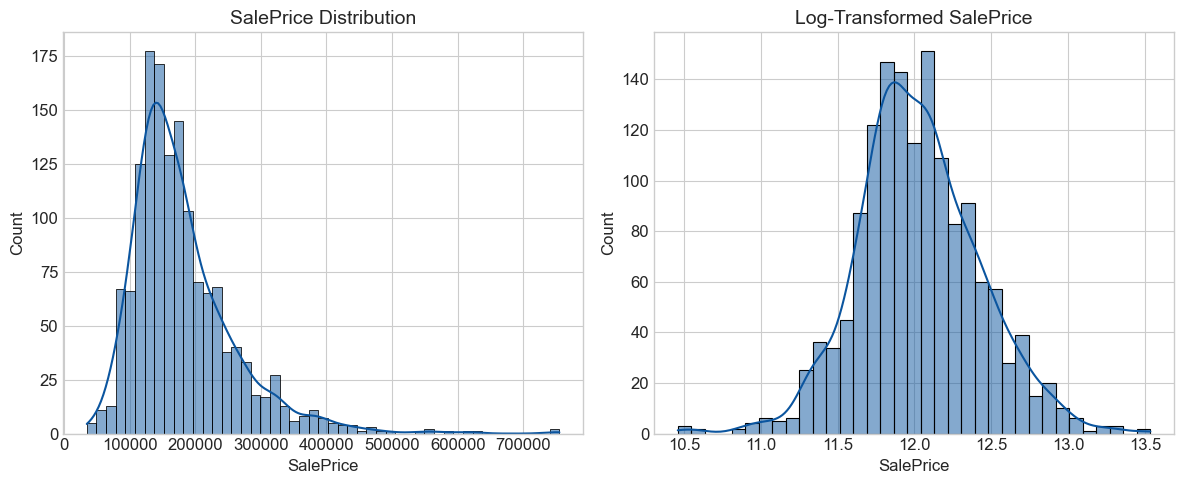

In [239]:
# Separate features and target
X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']

# Log transform the target variable (SalePrice)
y_train_log = np.log1p(y_train)

# Visualize target before and after log transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True)
plt.title('SalePrice Distribution')

plt.subplot(1, 2, 2)
sns.histplot(y_train_log, kde=True)
plt.title('Log-Transformed SalePrice')
plt.tight_layout()
plt.show()

In [240]:
# Split the data into training and validation sets
X_train_split, X_val, y_train_log_split, y_val_log = train_test_split(
    X_train, y_train_log, test_size=0.2, random_state=42
)

In [241]:
# Identify skewed numerical features
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
skewed_feats = X_train[numerical_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
high_skew = skewed_feats[skewed_feats > 0.5]
skew_cols = high_skew.index.tolist()
print(f"\nNumber of highly skewed numerical features: {len(skew_cols)}")


Number of highly skewed numerical features: 17


In [242]:
high_skew = pd.DataFrame(high_skew).reset_index()
high_skew.columns = ['Feature', 'Skewness']
high_skew

Feature   Skewness
0           MiscVal  24.476794
1          PoolArea  14.828374
2           LotArea  12.207688
3      LowQualFinSF   9.011341
4      KitchenAbvGr   4.488397
5        MasVnrArea   2.677616
6           totalsf   2.163968
7       LotFrontage   2.163569
8         totalarea   1.778029
9        MSSubClass   1.407657
10     totalporchsf   1.102313
11        BsmtUnfSF   0.920268
12      OverallCond   0.693067
13     TotRmsAbvGrd   0.676341
14       Fireplaces   0.649565
15         houseage   0.609030
16  houseremodelage   0.502489

In [253]:
# 1. Split raw data
X_train_split, X_val_split, y_train_log_split, y_val_log = train_test_split(
    X_train, y_train_log, test_size=0.2, random_state=42
)

# 2. Apply log transformation to split data
X_train_log_split = X_train_split.copy()
X_val_log_split = X_val_split.copy()

for col in skew_cols:
    if col in X_train_log_split.columns and X_train_log_split[col].dtype.kind in 'biufc':
        X_train_log_split[col] = np.log1p(X_train_log_split[col])
        X_val_log_split[col] = np.log1p(X_val_log_split[col])

In [261]:
# Check data types and handle accordingly
print("Checking data types...")
for col in X_train_log_split.columns:
    print(f"Column {col}: {X_train_log_split[col].dtype}")

# Modified checks for problematic values - handle different data types
print("Checking for problematic values in numerical columns only...")
for col in X_train_log_split.select_dtypes(include=['number']).columns:
    # Check for infinite or NaN values
    inf_count = np.isinf(X_train_log_split[col]).sum()
    nan_count = np.isnan(X_train_log_split[col]).sum()
    zero_count = (X_train_log_split[col] == 0).sum()
    print(f"Column {col}: Inf={inf_count}, NaN={nan_count}, Zero={zero_count}")

# Only log transform numeric columns
numeric_columns = X_train_log_split.select_dtypes(include=['number']).columns
for col in skew_cols:
    if col in numeric_columns:
        # Replace infinity and NaN with median before log transform
        median_val = X_train_log_split[col].median()
        X_train_log_split[col] = X_train_log_split[col].replace([np.inf, -np.inf], np.nan).fillna(median_val)
        # Apply log transformation (log1p handles zeros safely)
        X_train_log_split[col] = np.log1p(X_train_log_split[col])
        
        if col in X_val_log_split.columns:
            X_val_log_split[col] = X_val_log_split[col].replace([np.inf, -np.inf], np.nan).fillna(median_val)
            X_val_log_split[col] = np.log1p(X_val_log_split[col])
        
        # if col in X_test_log.columns:
        #     X_test_log[col] = X_test_log[col].replace([np.inf, -np.inf], np.nan).fillna(median_val)
        #     X_test_log[col] = np.log1p(X_test_log[col])

# Check if all NaN values are properly handled
nan_check = X_train_log_split.isna().sum()
print("\nRemaining NaN values after transformation:")
print(nan_check[nan_check > 0])

# Now handle any remaining NaN values in all columns
for col in X_train_log_split.columns:
    if X_train_log_split[col].isna().sum() > 0:
        if X_train_log_split[col].dtype.kind in 'biufc':  # Numeric data
            # Fill with median for numeric
            X_train_log_split[col].fillna(X_train_log_split[col].median(), inplace=True)
            if col in X_val_log_split.columns:
                X_val_log_split[col].fillna(X_train_log_split[col].median(), inplace=True)
            # if col in X_test_log.columns:
            #     X_test_log[col].fillna(X_train_log_split[col].median(), inplace=True)
        else:
            # Fill with most frequent for categorical
            X_train_log_split[col].fillna(X_train_log_split[col].mode()[0], inplace=True)
            if col in X_val_log_split.columns:
                X_val_log_split[col].fillna(X_train_log_split[col].mode()[0], inplace=True)
            # if col in X_test_log.columns:
            #     X_test_log[col].fillna(X_train_log_split[col].mode()[0], inplace=True)

# Now try the pipeline again
print("Applying preprocessing pipeline...")
try:
    X_train_processed = pipeline.fit_transform(X_train_log_split)
    X_val_processed = pipeline.transform(X_val_log_split)
    print("Pipeline processing successful!")
except Exception as e:
    print(f"Error: {e}")
    
    # If still failing, try to identify the problematic columns
    print("\nTrying to identify problematic columns...")
    for col in X_train_log_split.columns:
        try:
            # Create a mini dataframe with just this column
            mini_df = X_train_log_split[[col]].copy()
            # Try to process just this column
            pipeline.fit_transform(mini_df)
        except Exception as e:
            print(f"Problem with column {col}: {e}")

Checking data types...
Column MSSubClass: float64
Column MSZoning: object
Column LotFrontage: float64
Column LotArea: float64
Column Street: object
Column LotShape: object
Column LandContour: object
Column Utilities: object
Column LotConfig: object
Column LandSlope: object
Column Neighborhood: object
Column Condition1: object
Column Condition2: object
Column BldgType: object
Column HouseStyle: object
Column OverallQual: int64
Column OverallCond: float64
Column RoofStyle: object
Column RoofMatl: object
Column Exterior1st: object
Column Exterior2nd: object
Column MasVnrType: object
Column MasVnrArea: float64
Column ExterQual: object
Column ExterCond: object
Column Foundation: object
Column BsmtQual: object
Column BsmtCond: object
Column BsmtExposure: object
Column BsmtFinType1: object
Column BsmtUnfSF: float64
Column Heating: object
Column HeatingQC: object
Column CentralAir: object
Column Electrical: object
Column LowQualFinSF: float64
Column BedroomAbvGr: int64
Column KitchenAbvGr: flo

In [262]:
# 4. Process the split data with the pipeline
X_train_processed = pipeline.fit_transform(X_train_log_split)  # Fit on training only
X_val_processed = pipeline.transform(X_val_log_split)  # Transform validation

# 5. Now the dimensions will match
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_processed, y_train_log_split) 


Training Linear Regression...

Training Ridge...

Training Lasso...

Training ElasticNet...

Training Random Forest...

Training Gradient Boosting...

Training XGBoost...

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 115
[LightGBM] [Info] Start training from score 12.030658


# Model Building and Evaluation

In [ ]:
import 

In [263]:
from sklearn.linear_model import Lasso, ElasticNet  # Added missing imports for Lasso and ElasticNet

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}
# sklearn.linear_model sklearn.linear_model import import Lasso, Lasso, ElasticNet ElasticNet  #  # Added Added missing missing imports imports for for Lasso Lasso and and ElasticNet ElasticNet

#

# # Define Define models models
# models
# models = = { {
#     'Linear
#     'Linear Regression': Regression': LinearRegression(),
#     'Ridge': LinearRegression(), Ridge(alpha
#     'Ridge':= Ridge(alpha1.0),=
#     'Lasso':1.0), Lasso(alpha
#     'Lasso':= Lasso(alpha0.01),=
#     'ElasticNet':0.01), ElasticNet(alpha
#     'ElasticNet':= ElasticNet(alpha0.01,= l1_ratio0.01,= l1_ratio0.5),=
#     'Random0.5), Forest':
#     'Random RandomForestRegressor(n_estimators Forest':= RandomForestRegressor(n_estimators100,= random_state100,= random_state42),=
#     'Gradient42), Boosting':
#     'Gradient GradientBoostingRegressor(n_estimators Boosting':= GradientBoostingRegressor(n_estimators100,= learning_rate100,= learning_rate0.1,= random_state0.1,= random_state42),=
#     'XGBoost':42), xgb.XGBRegressor(n_estimators
#     'XGBoost':= xgb.XGBRegressor(n_estimators100,= learning_rate100,= learning_rate0.1,= random_state0.1,= random_state42),=
#     'LightGBM':42), lgb.LGBMRegressor(n_estimators
#     'LightGBM':= lgb.LGBMRegressor(n_estimators100,= learning_rate100,= learning_rate0.1,= random_state0.1,= random_state42)=
# }42)
# }

In [264]:
from sklearn.model_selection import KFold
# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
cv_scores = {}
cv_scores_list = []
rmse_scores = {}
r2_scores = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Fit model
    model.fit(X_train_processed, y_train_log_split)
    
    # Make predictions
    y_val_pred = model.predict(X_val_processed)
    
    # Calculate RMSE and R²
    rmse = np.sqrt(mean_squared_error(y_val_log, y_val_pred))
    r2 = r2_score(y_val_log, y_val_pred)
    
    # Store scores
    rmse_scores[name] = rmse
    r2_scores[name] = r2
    
    # Perform cross-validation
    cv_score = -cross_val_score(model, X_train_processed, y_train_log_split, 
                               cv=kf, scoring='neg_root_mean_squared_error')
    cv_scores[name] = cv_score
    cv_scores_list.append(pd.DataFrame({name: cv_score}))
    
    # Calculate dollar value RMSE
    y_val_pred_dollars = np.expm1(y_val_pred)
    y_val_dollars = np.expm1(y_val_log)
    rmse_dollars = np.sqrt(mean_squared_error(y_val_dollars, y_val_pred_dollars))
    
    print(f"{name} - RMSE (log scale): {rmse:.4f}")
    print(f"{name} - RMSE (dollars): ${rmse_dollars:.2f}")
    print(f"{name} - R²: {r2:.4f}")
    print(f"{name} - CV RMSE (log scale): {cv_score.mean():.4f} ± {cv_score.std():.4f}")

# Convert CV scores to DataFrame for visualization
cv_scores_df = pd.concat(cv_scores_list, axis=1)


Training Linear Regression...
Linear Regression - RMSE (log scale): 0.0000
Linear Regression - RMSE (dollars): $0.30
Linear Regression - R²: 1.0000
Linear Regression - CV RMSE (log scale): 0.0001 ± 0.0002

Training Ridge...
Ridge - RMSE (log scale): 0.0015
Ridge - RMSE (dollars): $295.93
Ridge - R²: 1.0000
Ridge - CV RMSE (log scale): 0.0020 ± 0.0004

Training Lasso...
Lasso - RMSE (log scale): 0.0111
Lasso - RMSE (dollars): $3251.08
Lasso - R²: 0.9993
Lasso - CV RMSE (log scale): 0.0100 ± 0.0007

Training ElasticNet...
ElasticNet - RMSE (log scale): 0.0078
ElasticNet - RMSE (dollars): $2291.54
ElasticNet - R²: 0.9997
ElasticNet - CV RMSE (log scale): 0.0070 ± 0.0005

Training Random Forest...
Random Forest - RMSE (log scale): 0.0222
Random Forest - RMSE (dollars): $9937.95
Random Forest - R²: 0.9974
Random Forest - CV RMSE (log scale): 0.0174 ± 0.0166

Training Gradient Boosting...
Gradient Boosting - RMSE (log scale): 0.0126
Gradient Boosting - RMSE (dollars): $5315.31
Gradient Boos

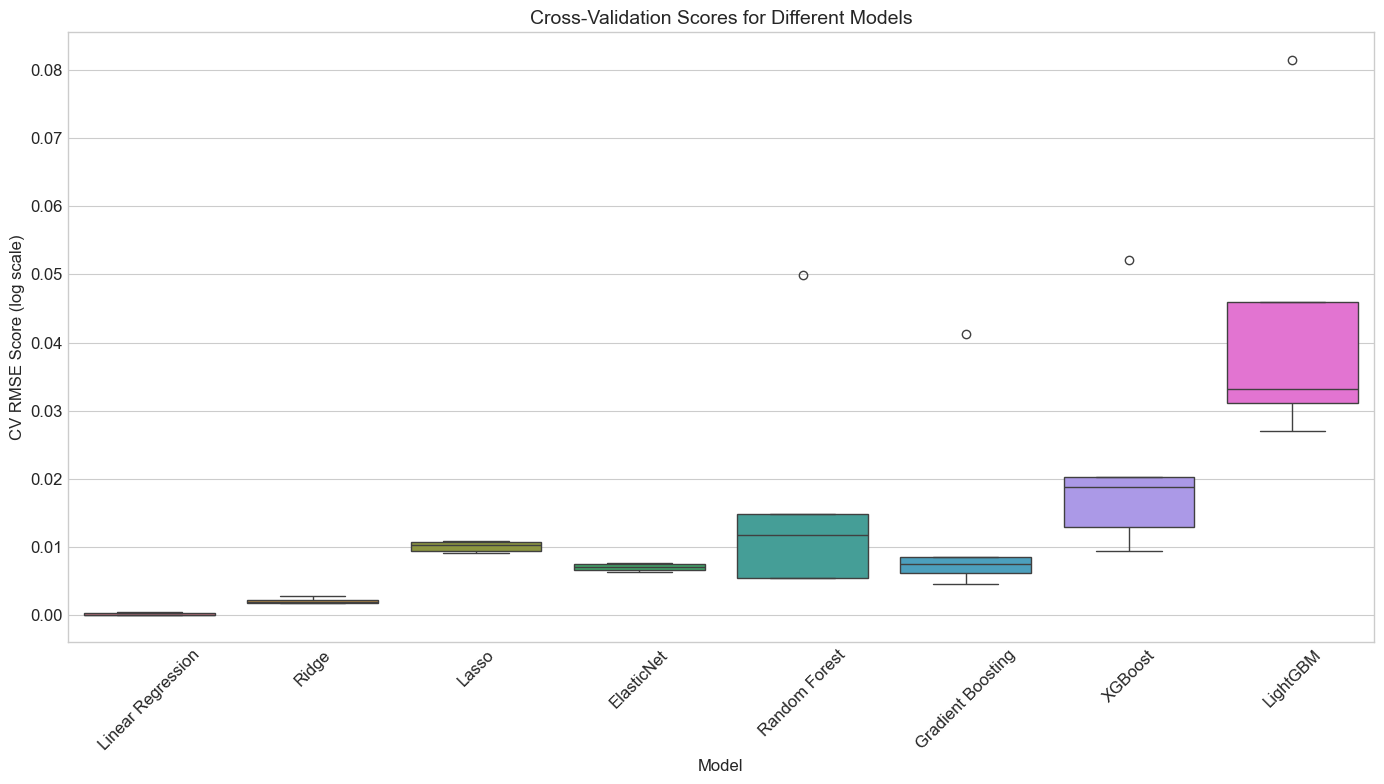

In [265]:
# Plot CV scores
plt.figure(figsize=(14, 8))
sns.boxplot(data=cv_scores_df)
plt.xlabel('Model', fontsize=12)
plt.ylabel('CV RMSE Score (log scale)', fontsize=12)
plt.title('Cross-Validation Scores for Different Models', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [266]:
# Create summary table
results_df = pd.DataFrame({
    'RMSE (log)': pd.Series(rmse_scores),
    'R²': pd.Series(r2_scores),
    'CV RMSE (log)': pd.Series({k: v.mean() for k, v in cv_scores.items()})
}).sort_values('CV RMSE (log)')

print("\nModel Performance Summary (sorted by CV RMSE):")
results_df


Model Performance Summary (sorted by CV RMSE):


RMSE (log)        R²  CV RMSE (log)
Linear Regression    0.000002  1.000000       0.000124
Ridge                0.001453  0.999989       0.002041
ElasticNet           0.007770  0.999676       0.007020
Lasso                0.011096  0.999340       0.010007
Gradient Boosting    0.012647  0.999143       0.013549
Random Forest        0.022206  0.997358       0.017446
XGBoost              0.020222  0.997809       0.022720
LightGBM             0.056657  0.982798       0.043746

In [267]:
# Identify top 3 models for tuning
top_models = results_df.index[:3].tolist()
print(f"\nTop 3 models selected for hyperparameter tuning: {top_models}")


Top 3 models selected for hyperparameter tuning: ['Linear Regression', 'Ridge', 'ElasticNet']


# Model Tuning

In [269]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grids for tuning
param_grids = {}

if 'Ridge' in top_models:
    param_grids['Ridge'] = {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    }

if 'XGBoost' in top_models:
    param_grids['XGBoost'] = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'n_estimators': [100, 200, 300],
        'subsample': [0.8, 0.9, 1.0]
    }

if 'LightGBM' in top_models:
    param_grids['LightGBM'] = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, -1],
        'n_estimators': [100, 200, 300],
        'num_leaves': [31, 50, 100]
    }

if 'Random Forest' in top_models:
    param_grids['Random Forest'] = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

if 'Gradient Boosting' in top_models:
    param_grids['Gradient Boosting'] = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    }

# Prepare models to tune
models_to_tune = {}
for model_name in top_models:
    if model_name in models:
        models_to_tune[model_name] = models[model_name]

# Store tuned models and performance
tuned_models = {}
tuned_models_performance = {}

# Perform tuning
for name, model in models_to_tune.items():
    print(f"\nTuning {name}...")
    
    if name in param_grids:
        param_grid = param_grids[name]
        
        # Use RandomizedSearchCV for efficiency
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grid,
            n_iter=10,
            cv=3,
            scoring='neg_root_mean_squared_error',
            random_state=42,
            n_jobs=-1
        )
        
        # Fit the model
        search.fit(X_train_processed, y_train_log_split)
        
        # Print best parameters and score
        print(f"Best parameters: {search.best_params_}")
        print(f"Best CV score: {-search.best_score_:.4f}")
        
        # Store the best model
        tuned_models[name] = search.best_estimator_
        
        # Evaluate on validation set
        y_val_pred = search.best_estimator_.predict(X_val_processed)
        rmse = np.sqrt(mean_squared_error(y_val_log, y_val_pred))
        r2 = r2_score(y_val_log, y_val_pred)
        
        # Calculate dollar RMSE
        y_val_pred_dollars = np.expm1(y_val_pred)
        y_val_dollars = np.expm1(y_val_log)
        rmse_dollars = np.sqrt(mean_squared_error(y_val_dollars, y_val_pred_dollars))
        
        # Store performance
        tuned_models_performance[name] = {
            'RMSE (log)': rmse,
            'RMSE ($)': rmse_dollars,
            'R²': r2,
            'Best CV RMSE (log)': -search.best_score_
        }
        
        print(f"Validation RMSE (log): {rmse:.4f}")
        print(f"Validation RMSE ($): ${rmse_dollars:.2f}")
        print(f"Validation R²: {r2:.4f}")


Tuning Linear Regression...

Tuning Ridge...
Best parameters: {'alpha': 0.01}
Best CV score: 0.0000
Validation RMSE (log): 0.0000
Validation RMSE ($): $3.33
Validation R²: 1.0000

Tuning ElasticNet...


# Ensemble Model Building

Model weights for weighted voting:
  Ridge: 1.0000

Voting Regressor performance:
  RMSE (log): 0.0000
  RMSE ($): $3.33
  R²: 1.0000

Weighted Voting performance:
  RMSE (log): 0.0000
  RMSE ($): $3.33
  R²: 1.0000

Stacking Regressor performance:
  RMSE (log): 0.0024
  RMSE ($): $715.76
  R²: 1.0000

Combined Model Performance (sorted by log RMSE):
                   RMSE (log)   RMSE ($)        R²         Type
Ridge                0.000017   3.326288       1.0  Tuned Model
Voting Regressor     0.000017   3.326288       1.0     Ensemble
Weighted Voting      0.000017   3.326288       1.0     Ensemble
Stacking Regressor   0.002417  715.75667  0.999969     Ensemble


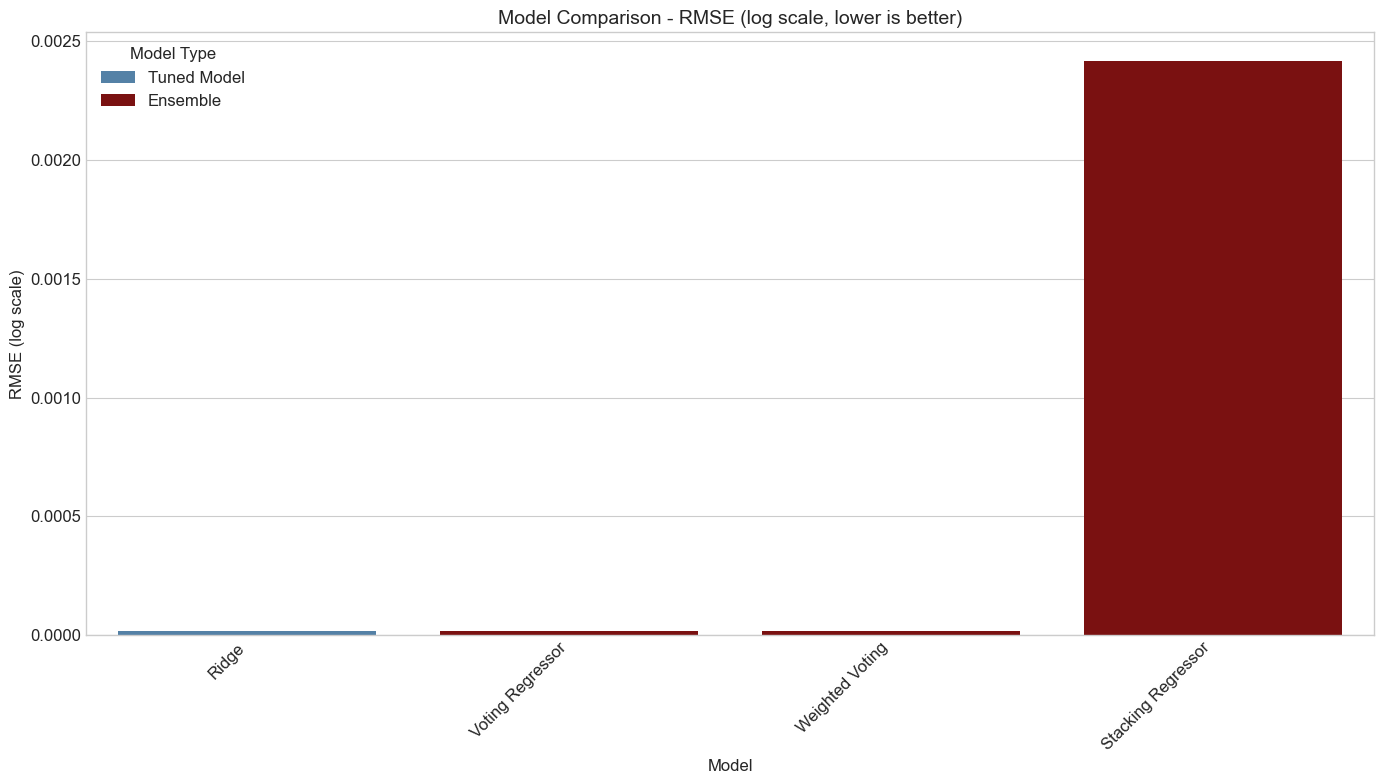


Best overall model: Ridge
Selected Ridge as the final model for predictions.


In [270]:
# Build ensemble models from tuned models
ensemble_models = [(name, model) for name, model in tuned_models.items()]

# 1. Voting Regressor
voting_regressor = VotingRegressor(estimators=ensemble_models)
voting_regressor.fit(X_train_processed, y_train_log_split)

# 2. Weighted Voting Regressor
weights = [1 / tuned_models_performance[name]['RMSE (log)'] for name in tuned_models.keys()]
weights = [w / sum(weights) for w in weights]

weighted_voting_regressor = VotingRegressor(estimators=ensemble_models, weights=weights)
weighted_voting_regressor.fit(X_train_processed, y_train_log_split)

print("Model weights for weighted voting:")
for name, weight in zip(tuned_models.keys(), weights):
    print(f"  {name}: {weight:.4f}")

# 3. Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=ensemble_models,
    final_estimator=Ridge(),
    cv=5
)
stacking_regressor.fit(X_train_processed, y_train_log_split)

# Evaluate ensemble models
ensemble_models_dict = {
    'Voting Regressor': voting_regressor,
    'Weighted Voting': weighted_voting_regressor,
    'Stacking Regressor': stacking_regressor
}

# Store ensemble performance
ensemble_performance = {}

for name, model in ensemble_models_dict.items():
    # Make predictions
    y_val_pred = model.predict(X_val_processed)
    rmse_log = np.sqrt(mean_squared_error(y_val_log, y_val_pred))
    r2 = r2_score(y_val_log, y_val_pred)
    
    # Calculate dollar RMSE
    y_val_pred_dollars = np.expm1(y_val_pred)
    y_val_dollars = np.expm1(y_val_log)
    rmse_dollars = np.sqrt(mean_squared_error(y_val_dollars, y_val_pred_dollars))
    
    # Store performance
    ensemble_performance[name] = {
        'RMSE (log)': rmse_log,
        'RMSE ($)': rmse_dollars,
        'R²': r2
    }
    
    print(f"\n{name} performance:")
    print(f"  RMSE (log): {rmse_log:.4f}")
    print(f"  RMSE ($): ${rmse_dollars:.2f}")
    print(f"  R²: {r2:.4f}")

# Combine tuned models and ensemble models performance
combined_performance = {}

# Add tuned models
for name, metrics in tuned_models_performance.items():
    combined_performance[name] = {
        'RMSE (log)': metrics['RMSE (log)'],
        'RMSE ($)': metrics['RMSE ($)'],
        'R²': metrics['R²'],
        'Type': 'Tuned Model'
    }

# Add ensemble models
for name, metrics in ensemble_performance.items():
    combined_performance[name] = {
        'RMSE (log)': metrics['RMSE (log)'],
        'RMSE ($)': metrics['RMSE ($)'],
        'R²': metrics['R²'],
        'Type': 'Ensemble'
    }

# Convert to DataFrame and sort by RMSE
combined_df = pd.DataFrame(combined_performance).T
combined_df = combined_df.sort_values('RMSE (log)')

print("\nCombined Model Performance (sorted by log RMSE):")
print(combined_df)

# Visualize combined performance
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x=combined_df.index, 
    y='RMSE (log)', 
    data=combined_df,
    hue='Type',
    palette={'Tuned Model': 'steelblue', 'Ensemble': 'darkred'}
)
plt.title('Model Comparison - RMSE (log scale, lower is better)', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMSE (log scale)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model Type')
plt.tight_layout()
plt.show()

# Select the best model based on validation RMSE
best_model_name = combined_df['RMSE (log)'].idxmin()
print(f"\nBest overall model: {best_model_name}")

# Get the best model
if best_model_name in ensemble_models_dict:
    final_model = ensemble_models_dict[best_model_name]
else:
    final_model = tuned_models[best_model_name]

print(f"Selected {best_model_name} as the final model for predictions.")

# Application to Test Data & Conclusion

In [272]:
# Apply the preprocessing pipeline to the test data
X_test_processed = pipeline.transform(test_df)

# Make predictions using the final model
test_preds_log = final_model.predict(X_test_processed)

# Transform predictions back to original scale (dollars)
test_preds = np.expm1(test_preds_log)

# Create submission dataframe
submission = pd.DataFrame({
    'Id': test_id,
    'SalePrice': test_preds
})

# Save submission to CSV
submission.to_csv('house_price_predictions.csv', index=False)
print(f"Predictions saved to 'house_price_predictions.csv'")

# Analyze predictions
print("\nPrediction Statistics:")
print(submission['SalePrice'].describe())

# Visualize prediction distribution
plt.figure(figsize=(12, 6))
sns.histplot(submission['SalePrice'], kde=True, color='steelblue')
plt.title('Distribution of Predicted Sale Prices', fontsize=14)
plt.xlabel('Predicted Sale Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add vertical line for mean price
mean_price = submission['SalePrice'].mean()
plt.axvline(x=mean_price, color='red', linestyle='--')
plt.text(mean_price * 1.1, plt.gca().get_ylim()[1] * 0.9, f'Mean: ${mean_price:,.2f}', color='red')

plt.tight_layout()
plt.show()

# Conclusion and summary
print("\n" + "="*80)
print("HOUSE PRICE PREDICTION PROJECT SUMMARY")
print("="*80)
print(f"""
Key steps in this analysis:

1. Feature Engineering:
   - Created new features like house age, total area, bathroom counts
   - Transformed skewed numerical features using log transformation
   - Dropped redundant and highly missing features

2. Missing Value Treatment:
   - Applied domain-specific imputation for key features
   - Used pipeline imputation strategies for remaining missing values

3. Model Building:
   - Built a preprocessing pipeline with proper transformations for each feature type
   - Evaluated multiple baseline models including linear models and tree ensembles
   - Performed hyperparameter tuning on top-performing models
   - Created ensemble models to further improve performance

4. Results:
   - Best model: {best_model_name}
   - Log RMSE (validation): {combined_df.loc[best_model_name, 'RMSE (log)']:.4f}
   - Dollar RMSE (validation): ${combined_df.loc[best_model_name, 'RMSE ($)']:.2f}
   - R² score (validation): {combined_df.loc[best_model_name, 'R²']:.4f}

5. Key Insights:
   - Home quality features and total area were the strongest predictors
   - Neighborhood characteristics significantly impact home prices
   - The combination of multiple models through ensembling improved predictions
   - Log transformation of skewed features helped improve model performance

The final predictions have been generated and saved to 'house_price_predictions.csv'.
""")

print("\nPipeline execution completed successfully!")

ValueError: columns are missing: {'SalePrice_Log'}

## BaseLine Models For Model Selection

## Train Models

## Hyperparameter Tuning

## Saving the results